Julián Y. Torres Torres, Carlos J. Barreto Mora, Juan A. Angulo Rincón
Taller 3
Universidad de los Andes, Bogotá, Colombia
{jy.torres, c.barretom, ja.angulor1}@uniandes.edu.co

#### Importar librerías

In [269]:
from sklearn import svm
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

##### Carga de los datos

In [2]:
#Carga de datos
df=pd.read_csv('Data_Taller_3.csv', sep=';')
df.head(5)

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
0,4.0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,80.0,0,8,0,1,6,4,0,5,0
1,2.0,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,80.0,1,10,3,3,10,7,1,7,0
2,3.0,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,80.0,0,7,3,3,0,0,0,0,0
3,3.0,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,80.0,0,8,3,3,8,7,3,0,0
4,2.0,NaN,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,80.0,1,6,3,3,2,2,2,2,0


In [3]:
#Número de columunas y filas del DataSet
row, col = df.shape
print('Número total de filas y columnas: {}'.format(row),'filas y {}'.format(col),'columnas en el dataset')

Número total de filas y columnas: 1506 filas y 36 columnas en el dataset


In [4]:
#Revisión del nombre de las columnas en el dataset
df.columns

Index(['JobSatisfaction', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'NewEmployee'],
      dtype='object')

In [5]:
# Descripción inicial de los datos, incluyendo datos categóricos
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
JobSatisfaction,1494.0,NaN,NaN,NaN,2.744311,1.099938,1.0,2.0,3.0,4.0,4.0
Age,1503.0,NaN,NaN,NaN,37.086494,10.848391,3.0,30.0,36.0,43.0,200.0
Attrition,1505,3,No,1254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1506,3,Travel_Rarely,1069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1506.0,NaN,NaN,NaN,803.978752,403.962331,102.0,465.0,805.0,1161.0,1499.0
Department,1506,3,Research & Development,989,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1506.0,NaN,NaN,NaN,9.229084,8.135153,1.0,2.0,7.0,14.0,29.0
Education,1506.0,NaN,NaN,NaN,2.915671,1.031172,1.0,2.0,3.0,4.0,7.0
EducationField,1506,7,Life Sciences,619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1506.0,NaN,NaN,NaN,1.000664,0.025768,1.0,1.0,1.0,1.0,2.0


###### Resultados
Para las variables categóricas se obtiene conteo, valores únicos, variable que mas se repite y la frecuencia. Por otro lado, para las variables continuas se obtiene conteo, media, desviación estándar, mínimo, máximo y cuartiles.

# Análisis Univariado

### Análisis de valores únicos de las variables
A continuación se realiza un análisis de los valores de las variables, para determinar posibles errores de typing en variables categóricas o variables que no influyan en el análisis.

In [6]:
#Valores únicos de cada columna
features=df.columns
print("El número de valores únicos se enlistan a continuación:\n")
for i in features:
  valoresunicos=df[i].nunique()
  print(i,valoresunicos)

El número de valores únicos se enlistan a continuación:

JobSatisfaction 4
Age 46
Attrition 3
BusinessTravel 3
DailyRate 886
Department 3
DistanceFromHome 29
Education 6
EducationField 7
EmployeeCount 2
EmployeeNumber 1506
EnvironmentSatisfaction 4
Gender 5
HourlyRate 76
JobInvolvement 4
JobLevel 5
JobRole 11
MaritalStatus 6
MonthlyIncome 1349
MonthlyRate 1427
NumCompaniesWorked 10
Over18 1
OverTime 3
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 38
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18
NewEmployee 2


Se observa que las variables de over18, StandarHours únicamente tienen un valor y por ello no influirian cuando se entrenen los modelos, por otro lado, la variable EmployeeNumber es una variable única que se asigna a cada empleado y por ende, tampoco tendría relación durante el entrenamiento de los modelos.

In [7]:
#Se eliminan las variables con valores únicos o variables que no tienen relación con el objetivo de los modelos.
df=df.drop(columns=['Over18','StandardHours','EmployeeNumber'])
df

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
0,4.0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,0,8,0,1,6,4,0,5,0
1,2.0,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,1,10,3,3,10,7,1,7,0
2,3.0,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,0,7,3,3,0,0,0,0,0
3,3.0,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,0,8,3,3,8,7,3,0,0
4,2.0,NaN,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,4.0,36.0,No,Non-Travel,845,Sales,1,5,Medical,1,...,2,0,7,6,3,1,0,0,0,0
1502,2.0,49.0,No,Travel_Rarely,174,Sales,8,4,Technical Degree,1,...,2,1,22,3,3,9,8,2,3,0
1503,1.0,27.0,No,Travel_Rarely,1302,Research & Development,19,3,Other,1,...,1,2,7,3,3,7,7,0,7,0
1504,2.0,44.0,Yes,Travel_Frequently,429,Research & Development,1,2,Medical,1,...,3,3,6,2,2,5,3,2,3,0


In [8]:
#Determinamos el número de valores nulos del data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   JobSatisfaction           1494 non-null   float64
 1   Age                       1503 non-null   float64
 2   Attrition                 1505 non-null   object 
 3   BusinessTravel            1506 non-null   object 
 4   DailyRate                 1506 non-null   int64  
 5   Department                1506 non-null   object 
 6   DistanceFromHome          1506 non-null   int64  
 7   Education                 1506 non-null   int64  
 8   EducationField            1506 non-null   object 
 9   EmployeeCount             1506 non-null   int64  
 10  EnvironmentSatisfaction   1506 non-null   int64  
 11  Gender                    1506 non-null   object 
 12  HourlyRate                1506 non-null   int64  
 13  JobInvolvement            1506 non-null   int64  
 14  JobLevel

Las variables que tienen valores nulos son las siguientes:
1. JobSatisfaction
2. Age
3. Attrition

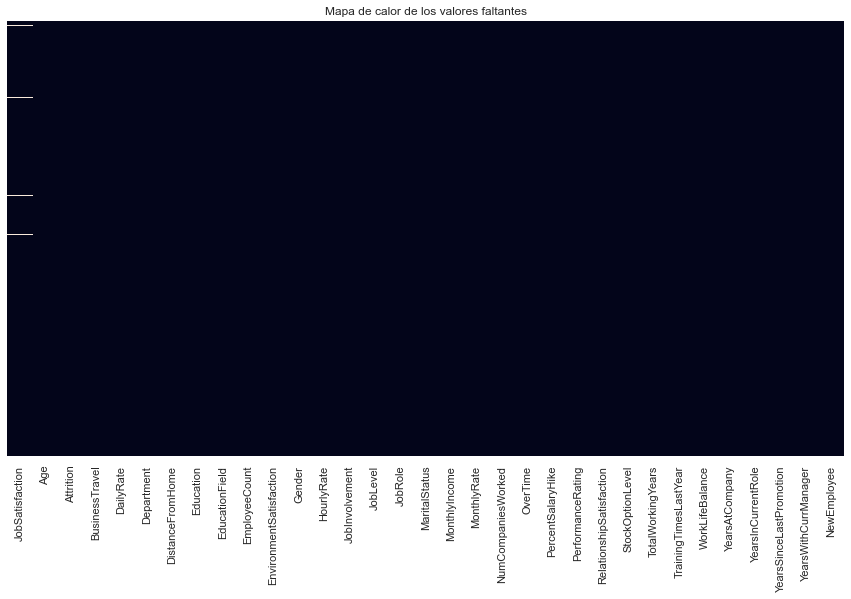

In [9]:
# Visualización de los valores nulos
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.title("Mapa de calor de los valores faltantes")
plt.show()

In [10]:
#Número de valores nulos de cada columna 
data=round(df.isnull().sum(),2)
nullValueCols=pd.DataFrame(data,columns=['Número de valores faltantes'])
nullValueCols.reset_index(inplace=True)
nullValueCols.rename(columns={'index': 'Columna'},inplace=True)
nullValueCols[nullValueCols['Número de valores faltantes']!=0]

,Columna,Número de valores faltantes
0,JobSatisfaction,12
1,Age,3
2,Attrition,1


##### Número de duplicados

In [11]:
df.duplicated().sum()

3

In [12]:
# Se eliminan duplicados del datafram
df=df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

Se observa que ya no hay valores duplicados en el dataset

In [14]:
df.describe()

,JobSatisfaction,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
count,1491.000000,1500.00000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,...,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2.745137,37.08000,804.103127,9.212242,2.914172,1.000665,2.726547,66.282768,2.730539,2.054558,...,2.714571,0.789754,11.218896,2.803061,2.759814,7.041251,4.209581,2.170326,4.114438,0.007984
std,1.099467,10.85456,403.952172,8.125321,1.031439,0.025794,1.092466,21.287719,0.716864,1.106068,...,1.080807,0.851709,7.779458,1.294181,0.704887,6.574243,3.619464,3.199159,3.573307,0.089026
min,1.000000,3.00000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,30.00000,465.000000,2.000000,2.000000,1.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,3.000000,36.00000,805.000000,7.000000,3.000000,1.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,4.000000,43.00000,1162.000000,14.000000,4.000000,1.000000,4.000000,84.000000,3.000000,3.000000,...,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,4.000000,200.00000,1499.000000,29.000000,7.000000,2.000000,4.000000,190.000000,4.000000,5.000000,...,4.000000,3.000000,40.000000,6.000000,4.000000,100.000000,18.000000,15.000000,17.000000,1.000000


Cómo se observa en la descripción del dataframe anterior, las variables de 'Age' y 'YearsAtCompany' tienen valores atípicos muy marcados,edades mayores a 60 y menores a 60 años, y años laborados en la empresa de 100 años, por ende se realiza una revisión de estas variables.

Se remueven del dataframe los valores de prueba de los 12 empleados

In [186]:
dfprueba=df.drop(df[df['NewEmployee']==0].index)
dfprueba

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
15,NaN,29.0,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,...,3,1,10,1,3,10,9,8,8,1
69,NaN,36.0,Yes,Travel_Rarely,318,Research & Development,9,3,Medical,1,...,1,1,2,0,2,1,0,0,0,1
129,NaN,49.0,No,Travel_Rarely,470,Research & Development,20,4,Medical,1,...,3,0,16,2,2,15,11,5,11,1
265,NaN,29.0,No,Travel_Rarely,1210,Sales,2,3,Medical,1,...,2,2,10,2,3,0,0,0,0,1
604,NaN,42.0,No,Travel_Rarely,933,Research & Development,29,3,Life Sciences,1,...,4,1,10,3,2,9,8,7,8,1
739,NaN,27.0,No,Travel_Rarely,1055,Research & Development,2,4,Life Sciences,1,...,2,1,4,2,3,3,2,2,2,1
844,NaN,30.0,No,Travel_Rarely,852,Sales,10,3,Marketing,1,...,1,1,10,3,3,10,3,1,4,1
887,NaN,42.0,No,Travel_Frequently,458,Research & Development,26,5,Medical,1,...,3,0,20,6,3,1,0,0,0,1
907,NaN,44.0,No,Travel_Rarely,1099,Sales,5,3,Marketing,1,...,3,1,26,5,3,22,9,3,10,1
990,NaN,33.0,No,Travel_Frequently,1111,Sales,5,1,Life Sciences,1,...,1,0,8,2,4,5,4,1,2,1


In [187]:
df=df.drop(df[df['NewEmployee']==1].index)

# Variable JobSatisfaction

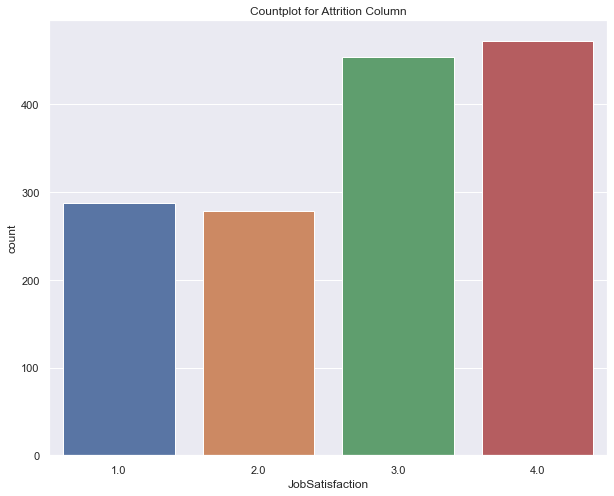

In [188]:
# Gráfico de la variable objetivo (JobSatisfaction) antes de la imputación de los valores
plt.figure(figsize = (10, 8))
Attrplot=sns.countplot(x = 'JobSatisfaction', data = df)
plt.title("Countplot for Attrition Column")
plt.show()

In [189]:
#Se realiza la imputación por frecuencia, se reemplazan los valores nulos por los mas frecuentes.
imputer = SimpleImputer(strategy='most_frequent')
df1=df.copy()
imputer.fit(df1[["JobSatisfaction"]])
df1["JobSatisfaction"] = imputer.transform(df1[["JobSatisfaction"]]).ravel()

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


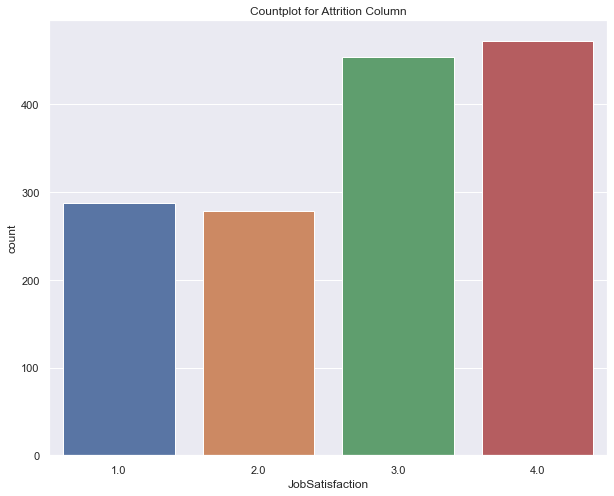

In [190]:
#Gráfico de la variable objetivo (JobSatisfaction) posteriormente de la imputación de los valores
plt.figure(figsize = (10, 8))
Attrplot=sns.countplot(x = 'JobSatisfaction', data = df1)
plt.title("Countplot for Attrition Column")
plt.show()

In [191]:
df1

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
0,4.0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,0,8,0,1,6,4,0,5,0
1,2.0,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,1,10,3,3,10,7,1,7,0
2,3.0,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,0,7,3,3,0,0,0,0,0
3,3.0,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,0,8,3,3,8,7,3,0,0
4,2.0,NaN,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,3.0,28.0,No,Travel_Frequently,994,Sales,9,3,Life Sciences,1,...,4,0,9,0,3,9,8,1,7,0
1499,4.0,31.0,No,Travel_Frequently,721,Research & Development,2,2,Medical,1,...,4,0,12,2,3,12,8,3,7,0
1501,4.0,36.0,No,Non-Travel,845,Sales,1,5,Medical,1,...,2,0,7,6,3,1,0,0,0,0
1503,1.0,27.0,No,Travel_Rarely,1302,Research & Development,19,3,Other,1,...,1,2,7,3,3,7,7,0,7,0


# Variable Age

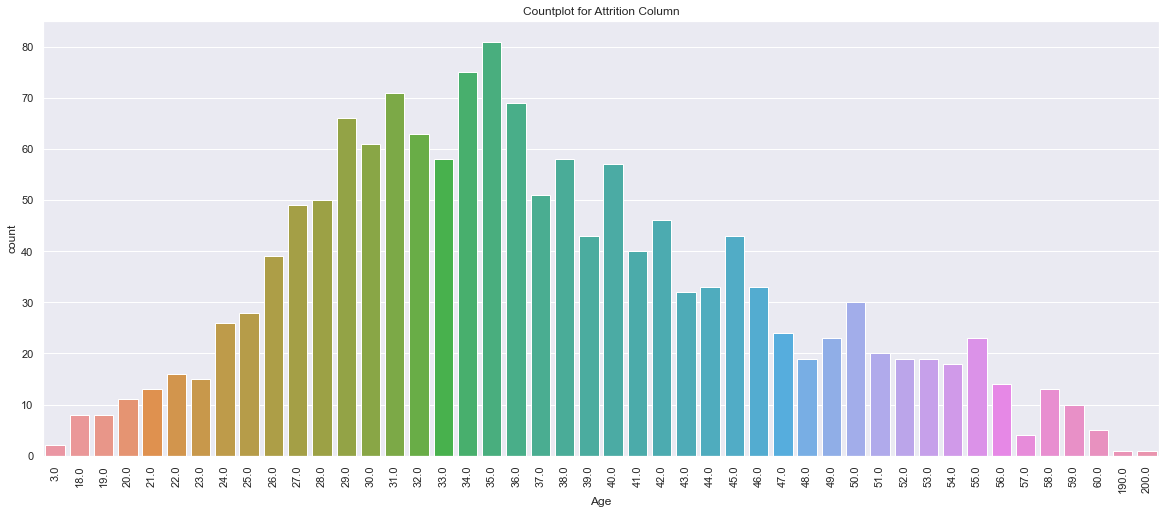

In [194]:
#Gráfico de la variable age
plt.figure(figsize = (20, 8))
Attrplot=sns.countplot(x = 'Age', data = df1)
plt.xticks(rotation=90)
plt.title("Countplot for Attrition Column")
plt.show()

In [195]:
df1['Age'].describe()

count    1488.000000
mean       37.071909
std        10.868082
min         3.000000
25%        30.000000
50%        36.000000
75%        43.000000
max       200.000000
Name: Age, dtype: float64

Se observa que para la variable edad hay valores atípicos menores a 18 y mayores a 60, por ello, se reemplazan dichos valores por la media (menores a 18) o 60 (mayores a 60) según sea el caso. Los valores faltantes se reemplazan por la media. 

In [196]:
df2=df1.copy()

In [197]:
#Se imputan los valores faltantes por la moda
df2['Age']=df2['Age'].fillna(0)
#Se reemplazan los valores mayores a 60 por 60
df2.loc[(df2.Age>60),'Age']=60
#Se reemplazan los valores menores a 18 por la media
df2.loc[(df2.Age<18),'Age']=df1['Age'].mode()[0]

In [198]:
df2['Age'].describe()

count    1491.000000
mean       36.929577
std         9.138223
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

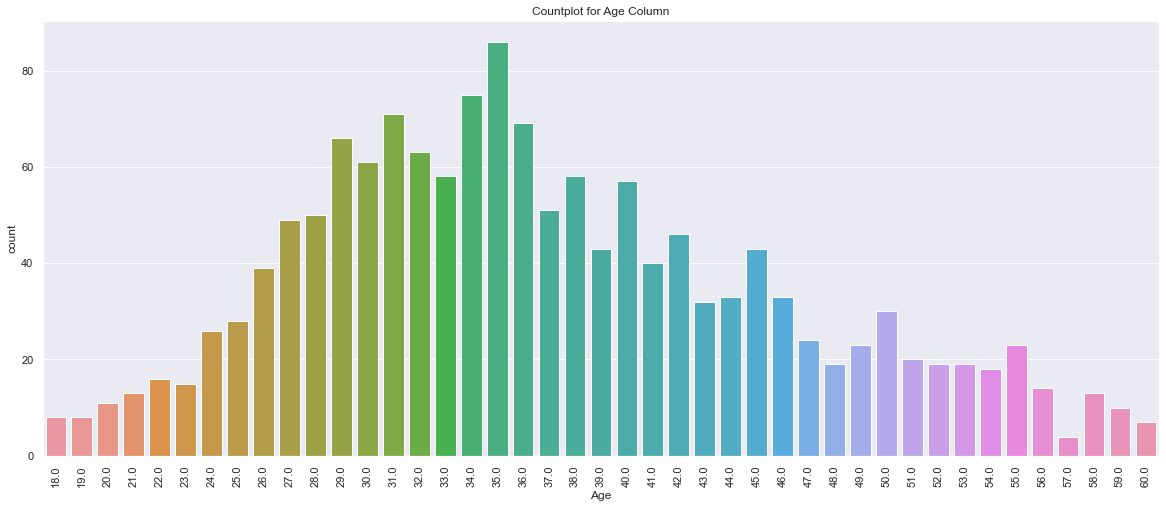

In [199]:
#Gráfico de la variable age
plt.figure(figsize = (20, 8))
Attrplot=sns.countplot(x = 'Age', data = df2)
plt.xticks(rotation=90)
plt.title("Countplot for Age Column")
plt.show()

# Variable Attrition

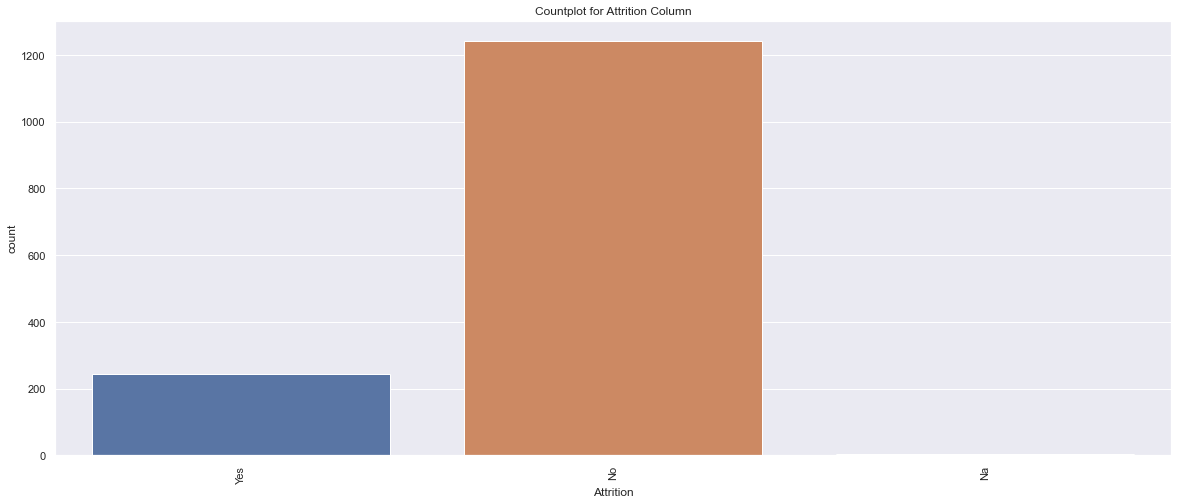

In [200]:
#Gráfico de la variable antes de imputar
plt.figure(figsize = (20, 8))
Attrplot=sns.countplot(x = 'Attrition', data = df2)
plt.xticks(rotation=90)
plt.title("Countplot for Attrition Column")
plt.show()

In [201]:
#Se realiza la imputación por frecuencia, se reemplazan los valores nulos por los mas frecuentes.
imputer = SimpleImputer(strategy='most_frequent')
df3=df2.copy()
imputer.fit(df1[["Attrition"]])
df3["Attrition"] = imputer.transform(df3[["Attrition"]]).ravel()

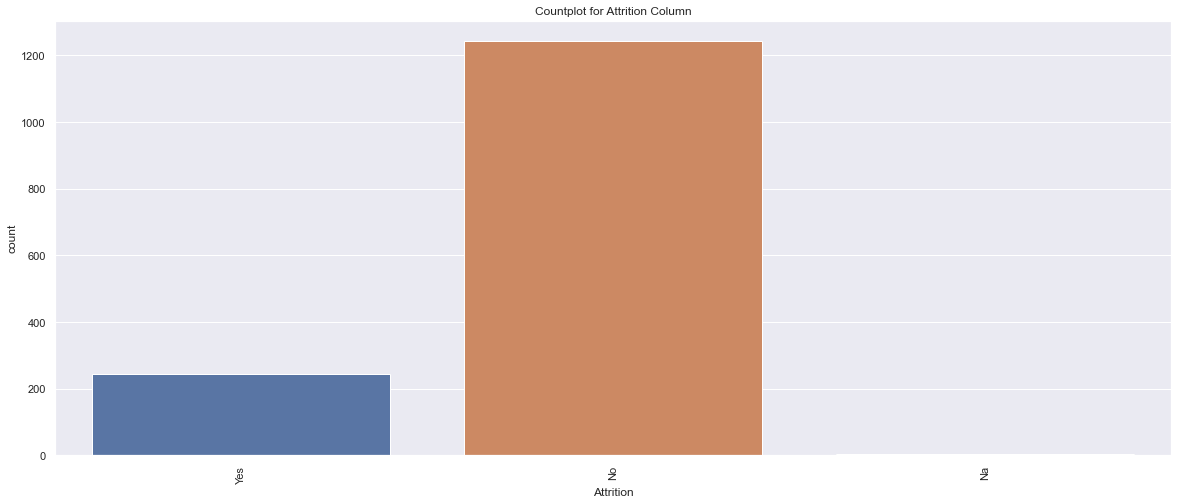

In [202]:
#Gráfico de la variable Attrition después de imputar 
plt.figure(figsize = (20, 8))
Attrplot=sns.countplot(x = 'Attrition', data = df3)
plt.xticks(rotation=90)
plt.title("Countplot for Attrition Column")
plt.show()

Se realiza la imputación con el valor mas frecuente de la variable

In [203]:
df3.describe()

,JobSatisfaction,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
count,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,...,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.0
mean,2.745137,36.929577,803.936955,9.184440,2.912140,1.000671,2.729041,66.242119,2.730382,2.050302,...,2.716298,0.789403,11.205231,2.802817,2.759222,7.042924,4.209926,2.169685,4.116030,0.0
std,1.099467,9.138223,404.379882,8.105938,1.031546,0.025898,1.091927,21.317441,0.717758,1.105577,...,1.080950,0.853682,7.776716,1.289094,0.704997,6.575593,3.617008,3.202355,3.569532,0.0
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2.000000,30.000000,465.000000,2.000000,2.000000,1.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.0
50%,3.000000,36.000000,805.000000,7.000000,3.000000,1.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.0
75%,4.000000,43.000000,1162.000000,14.000000,4.000000,1.000000,4.000000,84.000000,3.000000,3.000000,...,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.0
max,4.000000,60.000000,1499.000000,29.000000,7.000000,2.000000,4.000000,190.000000,4.000000,5.000000,...,4.000000,3.000000,40.000000,6.000000,4.000000,100.000000,18.000000,15.000000,17.000000,0.0


# Variable YearsAtCompany

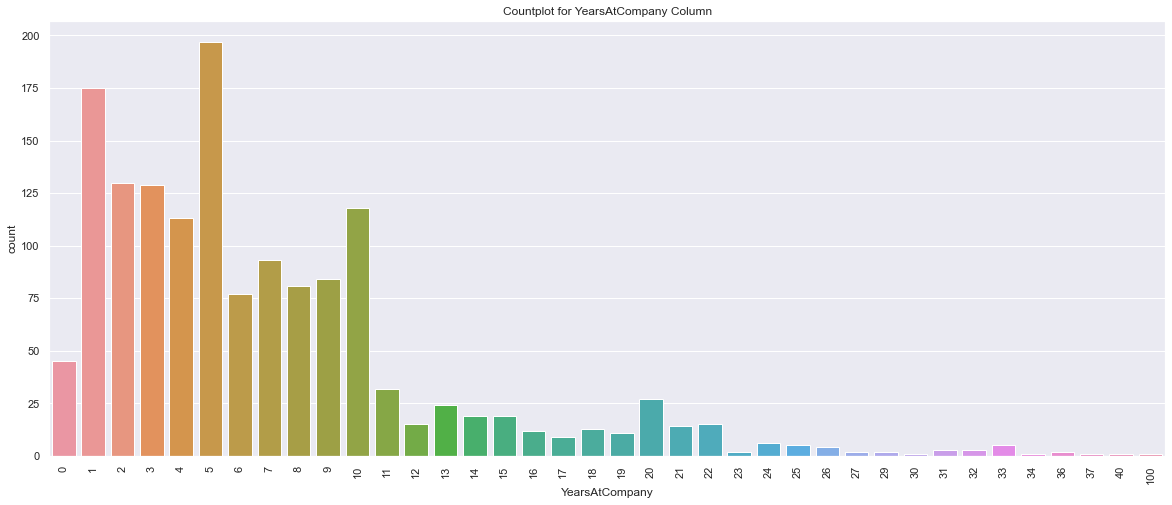

In [204]:
#Gráfico de la variable age
plt.figure(figsize = (20, 8))
Attrplot=sns.countplot(x = 'YearsAtCompany', data = df3)
plt.xticks(rotation=90)
plt.title("Countplot for YearsAtCompany Column")
plt.show()

In [205]:
year = df3[df3['YearsAtCompany'] > 40]
year

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
503,4.0,34.0,No,Travel_Rarely,1397,Research & Development,1,5,Life Sciences,1,...,4,1,10,4,2,100,9,8,8,0


Se observa que para le valor epecifíco en años en la compañia de 100 años, se puede reemplazar por el valor de 10 años, como se observa en la columna de años totales trabajados.

In [206]:
#Se reemplazan los valores mayores a 60 por 60
df3.loc[(df3.YearsAtCompany>40),'YearsAtCompany']=10

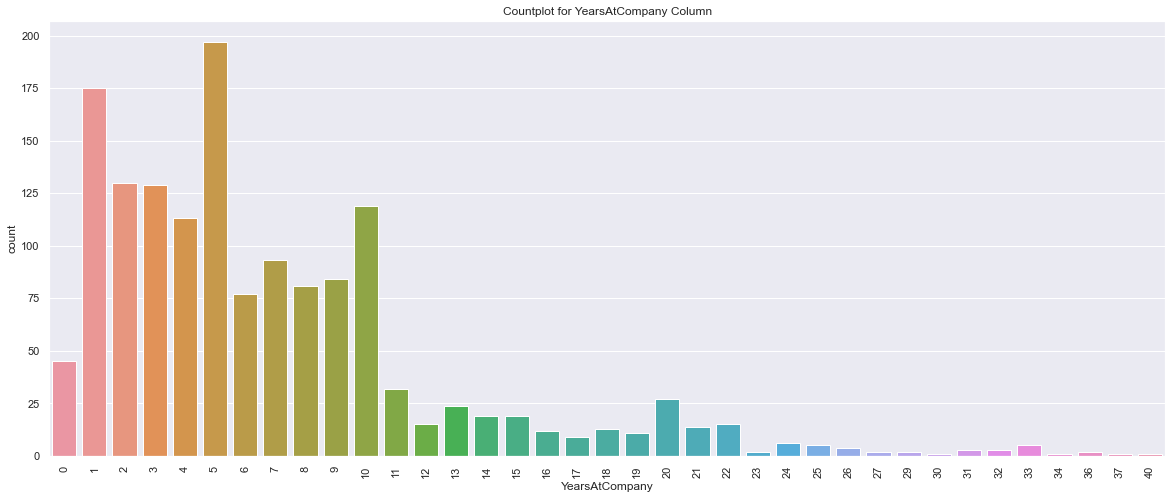

In [207]:
#Gráfico de la variable YearsAtCompany
plt.figure(figsize = (20, 8))
Attrplot=sns.countplot(x = 'YearsAtCompany', data = df3)
plt.xticks(rotation=90)
plt.title("Countplot for YearsAtCompany Column")
plt.show()

In [208]:
df3.isnull().sum()

JobSatisfaction             0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
NewEmployee                 0
dtype: int

Ya no se encuentran valores nulos en los datos

# Variable EmployeeCount

In [209]:
EmployeeCount = df3[df3['EmployeeCount'] == 2]
EmployeeCount

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
351,2.0,32.0,No,Travel_Rarely,1062,Research & Development,2,3,Medical,2,...,3,1,8,4,3,8,0,0,7,0


Se observa que la variable EmployeeCount tiene un único valor de 2 por ende se elimina dicha variable (columna) ya que no tendría mayor influencia durante el entrenamiento de los modelos

In [210]:
df3=df3.drop(columns=['EmployeeCount'])

# Correlación entre las variables númericas

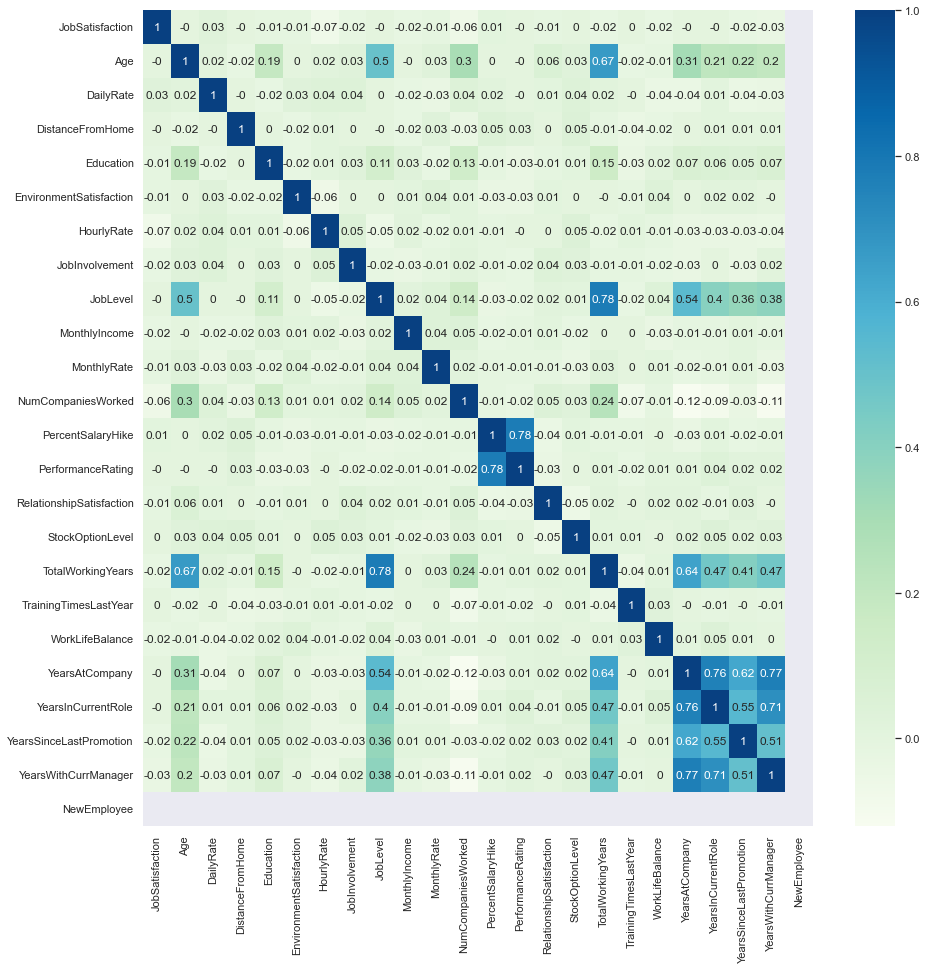

In [211]:
#Correlación de las variables 
plt.figure(figsize=(15,15))
sns.heatmap(round(df3.corr(),2),annot=True,mask=None,cmap='GnBu')
plt.show()

# Revisión de variables categóricas

In [212]:
#Variables categóricas
print("Valores posibles de la variable Attrition")
print(df3['Attrition'].unique())
print()
print("Valores posibles de la variable BusinessTravel")
print(df3['BusinessTravel'].unique())
print()
print("Valores posibles de la variable Department")
print(df3['Department'].unique())
print()
print("Valores posibles de la variable EducationField")
print(df3['EducationField'].unique())
print()
print("Valores posibles de la variable Gender")
print(df3['Gender'].unique())
print()
print("Valores posibles de la variable JobRole")
print(df3['JobRole'].unique())
print()
print("Valores posibles de la variable MaritalStatus")
print(df3['MaritalStatus'].unique())
print()
print("Valores posibles de la variable Overtime")
print(df3['OverTime'].unique())
print()

Valores posibles de la variable Attrition
['Yes' 'No' 'Na']

Valores posibles de la variable BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Valores posibles de la variable Department
['Sales' 'Research & Development' 'Human Resources']

Valores posibles de la variable EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources' 'Med']

Valores posibles de la variable Gender
['Fem' 'Male' 'man' 'Female' 'female']

Valores posibles de la variable JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources' 'Lab Tech'
 'RH']

Valores posibles de la variable MaritalStatus
['Single' 'Married' 'Divorced' 'S' 'D' 'M']

Valores posibles de la variable Overtime
['Yes' 'No' 'Na']



In [213]:
#Se realiza una corrección de las variables categóricas
df3.loc[(df3.EducationField=='Med'),'EducationField']='Medical'
df3.loc[(df3.Gender=='Fem'),'Gender']='Female'
df3.loc[(df3.Gender=='female'),'Gender']='Female'
df3.loc[(df3.Gender=='man'),'Gender']='Male'
df3.loc[(df3.JobRole=='Lab Tech'),'JobRole']='Laboratory Technician'
df3.loc[(df3.JobRole=='RH'),'JobRole']='Human Resources'
df3.loc[(df3.MaritalStatus=='S'),'MaritalStatus']='Single'
df3.loc[(df3.MaritalStatus=='D'),'MaritalStatus']='Divorced'
df3.loc[(df3.MaritalStatus=='M'),'MaritalStatus']='Married'
df3.loc[(df3.OverTime=='Na'),'OverTime']='No'
df3.loc[(df3.Attrition=='Na'),'Attrition']='No'

In [214]:
#Variables categóricas
print("Valores posibles de la variable Attrition")
print(df3['Attrition'].unique())
print()
print("Valores posibles de la variable EducationField")
print(df3['EducationField'].unique())
print()
print("Valores posibles de la variable Gender")
print(df3['Gender'].unique())
print()
print("Valores posibles de la variable JobRole")
print(df3['JobRole'].unique())
print()
print("Valores posibles de la variable MaritalStatus")
print(df3['MaritalStatus'].unique())
print()
print("Valores posibles de la variable Overtime")
print(df3['OverTime'].unique())
print()
dfp=df3.copy()

Valores posibles de la variable Attrition
['Yes' 'No']

Valores posibles de la variable EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Valores posibles de la variable Gender
['Female' 'Male']

Valores posibles de la variable JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

Valores posibles de la variable MaritalStatus
['Single' 'Married' 'Divorced']

Valores posibles de la variable Overtime
['Yes' 'No']



In [215]:
#Se separan las variables categóricas ya con los datos corregidos
Categorical=df3.select_dtypes(include=['object'])
rows,col=(Categorical.shape)
print("El número de variables categóricas es:",col)
print(Categorical.columns)

El número de variables categóricas es: 8
Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


In [216]:
#Se unen todos los datos en una única columna
Categoricaltotal=Categorical.melt()

C:\Users\Julian\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Julian\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


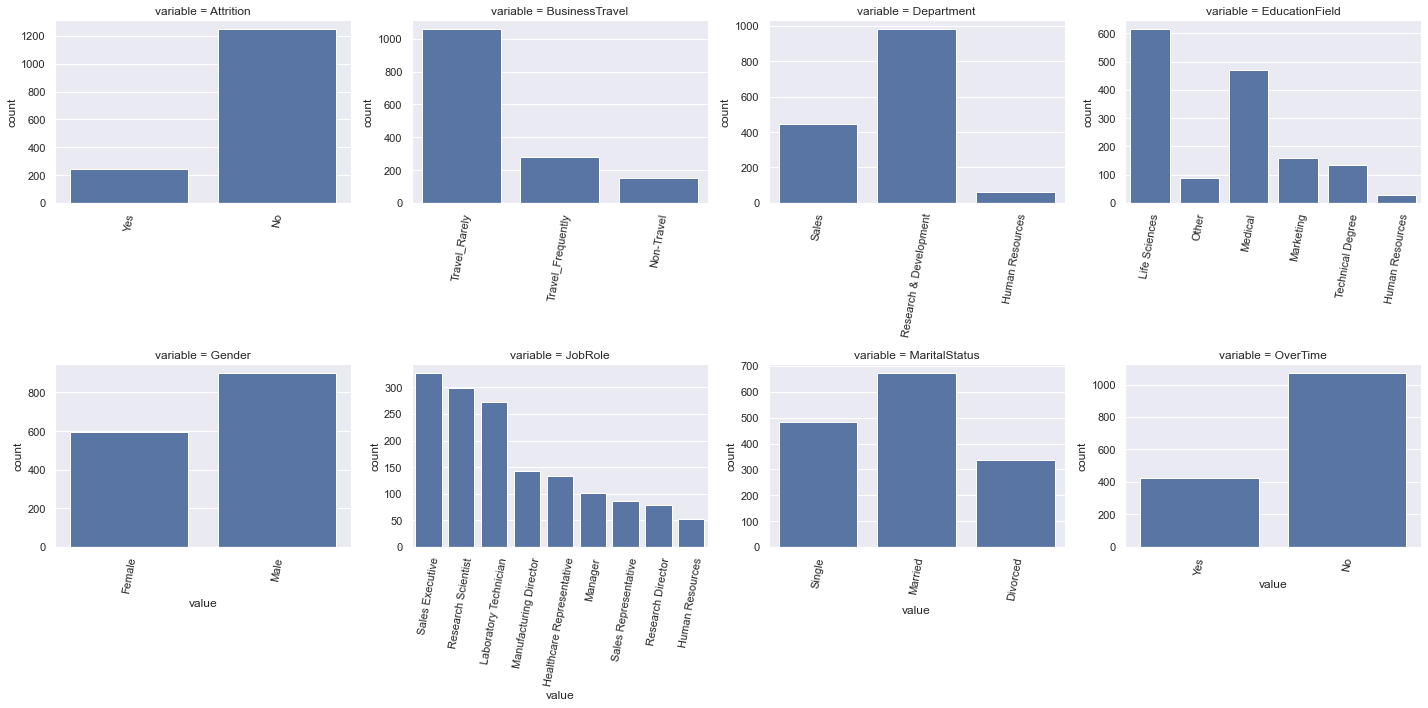

In [217]:
#Análisis univariado, visualización de los diagramas de barra para cada variable categórica
CatFacetGrid = sns.FacetGrid(Categoricaltotal, col='variable',sharex=False, 
                             dropna=True, sharey=False, size=5,col_wrap=4)
CatFacetGrid.set_xticklabels(rotation=80)
countPlot=CatFacetGrid.map(sns.countplot,'value')
countPlot.fig.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


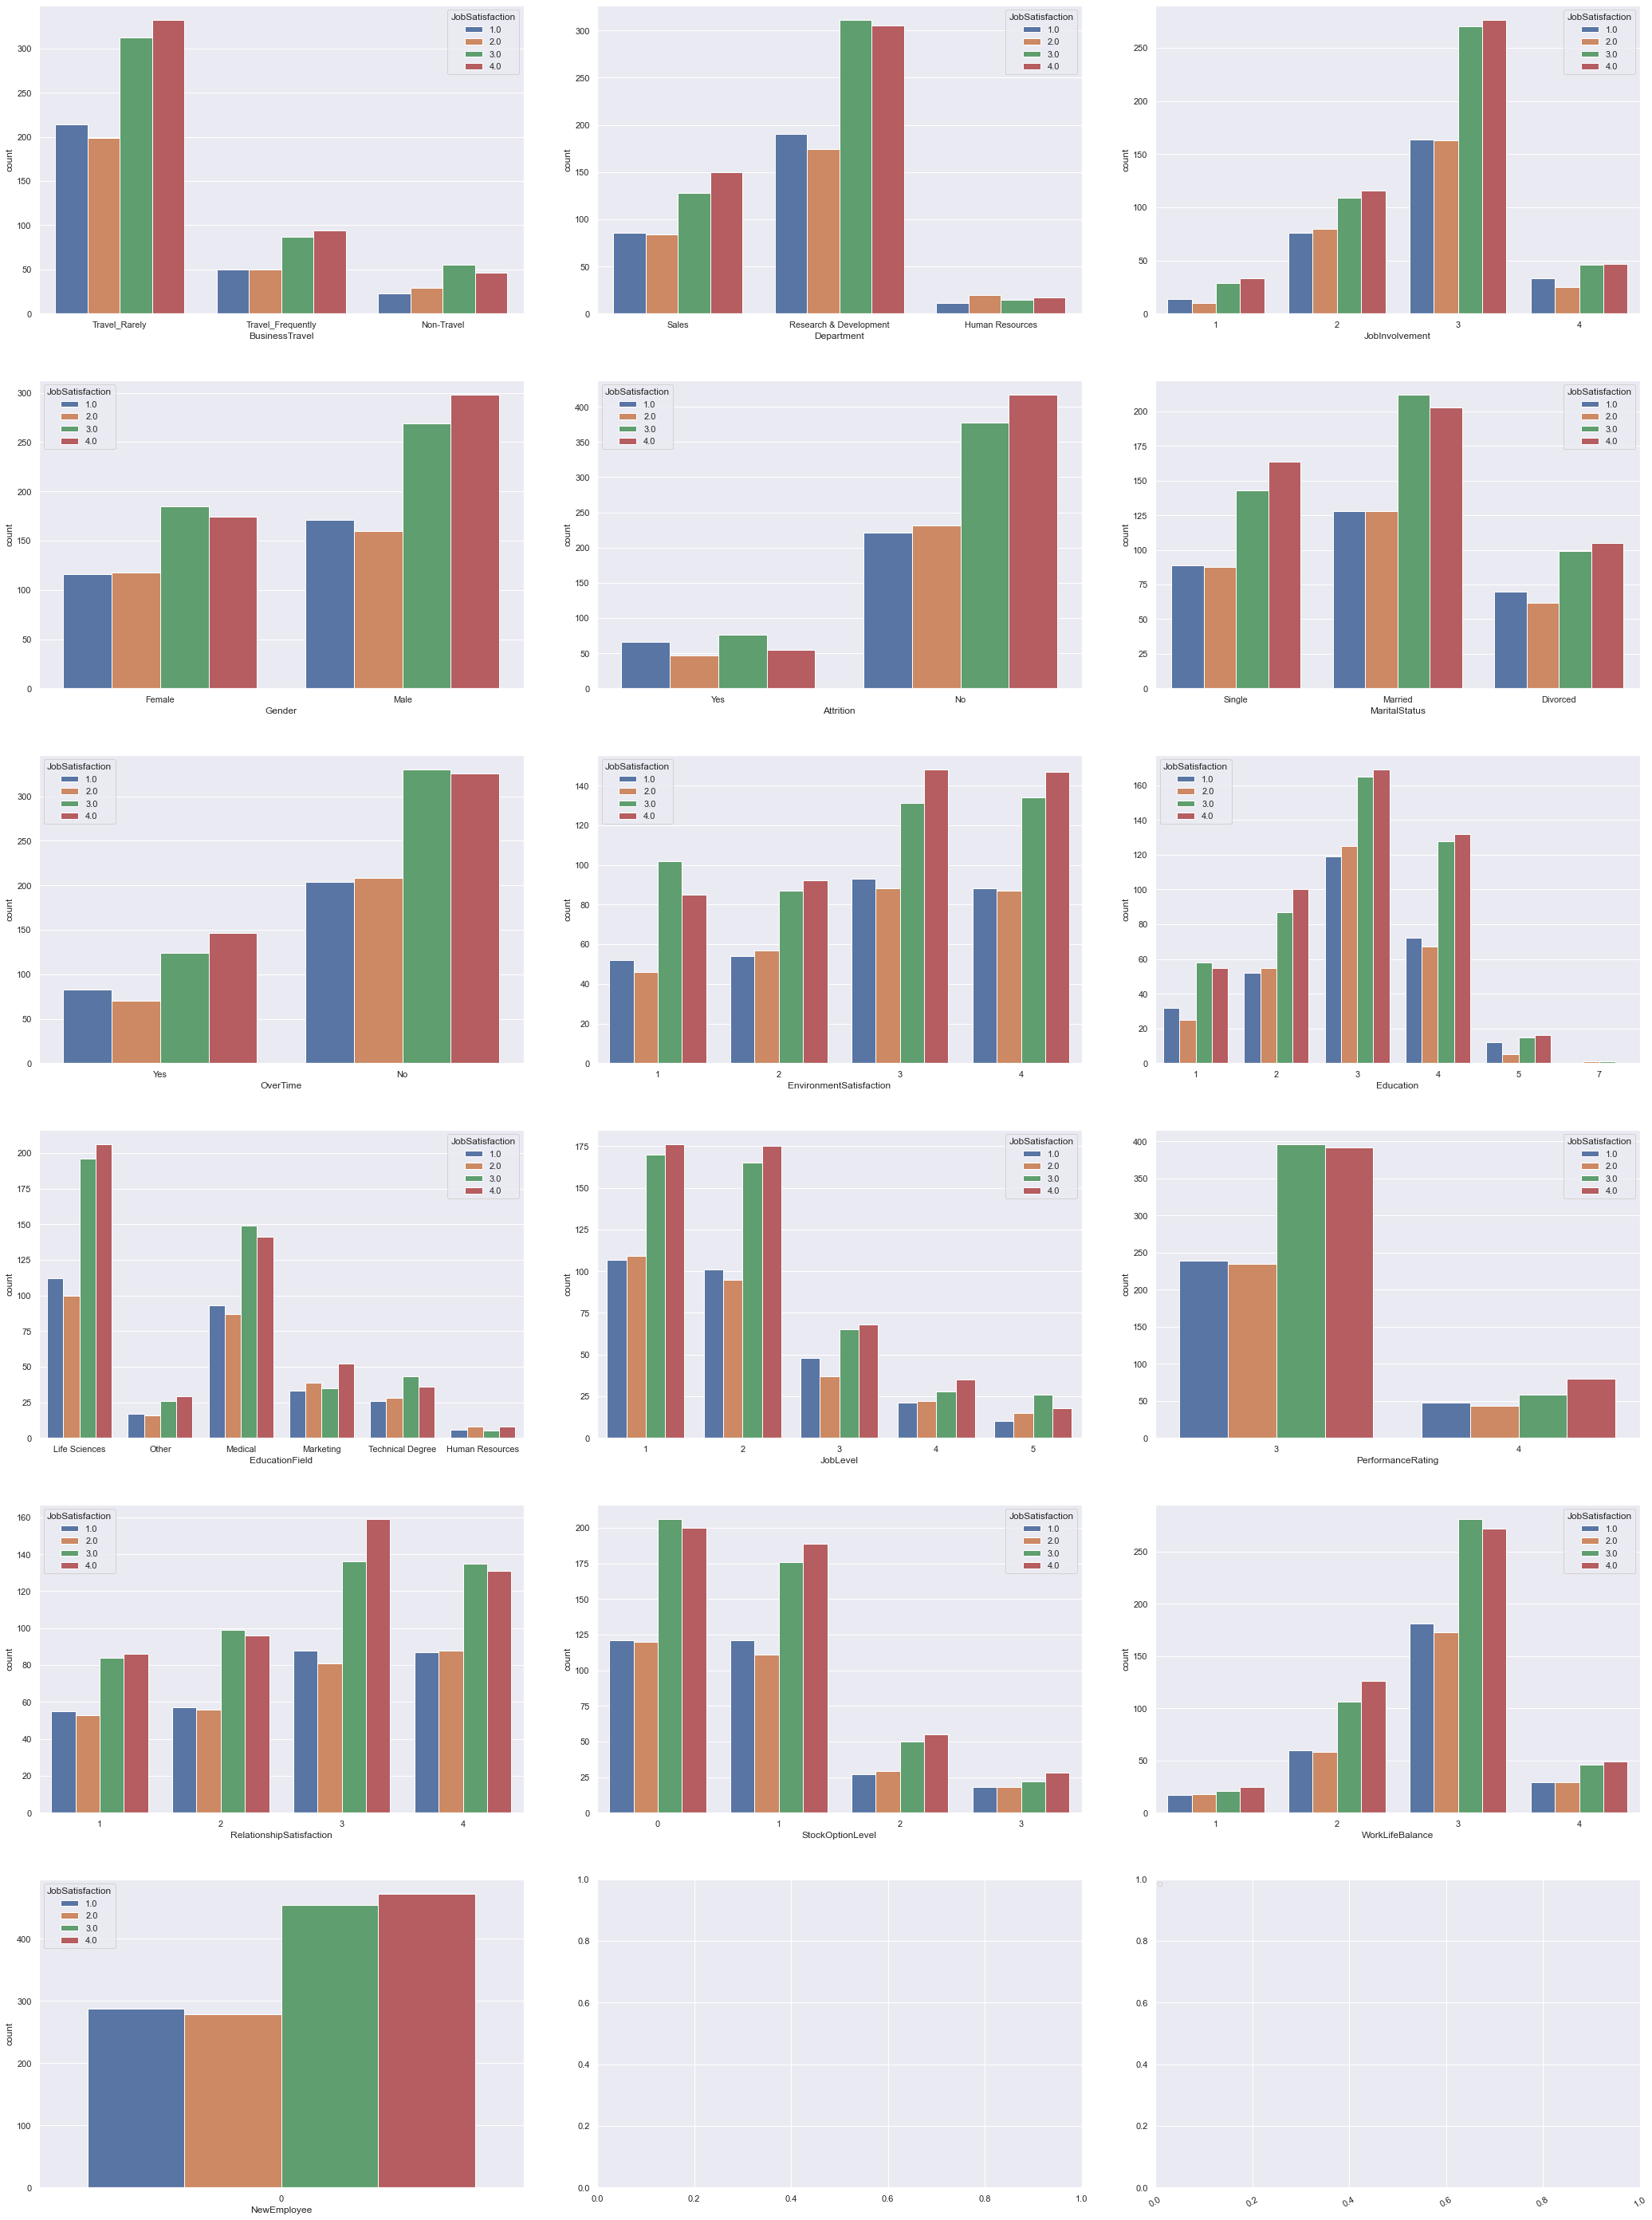

In [218]:
#Análisis bivariado de las variables categóricas con JobSatisfaction


#Inicialización de los gráficos
fig, axes = plt.subplots(nrows=6,ncols=3)
fig.set_size_inches(30, 40)
fig. tight_layout(pad=5.0)
plt.legend(loc=2, prop={'size': 6})

#Gráficos bivariados
a = sns.countplot(data=df3,x='BusinessTravel' ,
                orient = "v" , ax=axes[0][0],hue='JobSatisfaction')
b = sns.countplot(data=df3,x='Department' ,
                orient = "v" , ax=axes[0][1],hue='JobSatisfaction')
c = sns.countplot(data=df3,x='JobInvolvement',
                orient = "v" , ax=axes[0][2],hue='JobSatisfaction')
d = sns.countplot(data=df3,x='Gender',
                orient = "v" , ax=axes[1][0],hue='JobSatisfaction')
e = sns.countplot(data=df3,x='Attrition',
                orient = "v" , ax=axes[1][1],hue='JobSatisfaction')
f = sns.countplot(data=df3,x='MaritalStatus',
                orient = "v" , ax=axes[1][2],hue='JobSatisfaction')
g = sns.countplot(data=df3,x='OverTime',
                orient = "v" , ax=axes[2][0],hue='JobSatisfaction')
h = sns.countplot(data=df3,x='EnvironmentSatisfaction',
                orient = "v" , ax=axes[2][1],hue='JobSatisfaction')
i = sns.countplot(data=df3,x='Education',
                orient = "v" , ax=axes[2][2],hue='JobSatisfaction')
j = sns.countplot(data=df3,x='EducationField',
                orient = "v" , ax=axes[3][0],hue='JobSatisfaction')
k = sns.countplot(data=df3,x='JobLevel',
                orient = "v" , ax=axes[3][1],hue='JobSatisfaction')
l = sns.countplot(data=df3,x='PerformanceRating',
                orient = "v" , ax=axes[3][2],hue='JobSatisfaction')
m = sns.countplot(data=df3,x='RelationshipSatisfaction',
                orient = "v" , ax=axes[4][0],hue='JobSatisfaction')
n = sns.countplot(data=df3,x='StockOptionLevel',
                orient = "v" , ax=axes[4][1],hue='JobSatisfaction')
n = sns.countplot(data=df3,x='WorkLifeBalance',
                orient = "v" , ax=axes[4][2],hue='JobSatisfaction')
o = sns.countplot(data=df3,x='NewEmployee',
                orient = "v" , ax=axes[5][0],hue='JobSatisfaction')
plt.xticks(rotation=30)
plt.show()

In [219]:
#JobSatisfaction vs Numeric Variables
NumericVariables=df3[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome',
                        'MonthlyRate','PercentSalaryHike','TotalWorkingYears',
                        'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','NumCompaniesWorked',
                        'YearsSinceLastPromotion','YearsWithCurrManager']]

In [220]:
#Creación del dataframe
NumericBV=NumericVariables
NumericBV['JobSatisfaction']=df3['JobSatisfaction']

C:\Users\Julian\AppData\Local\Temp\ipykernel_34432\1644669432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NumericBV['JobSatisfaction']=df3['JobSatisfaction']


C:\Users\Julian\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


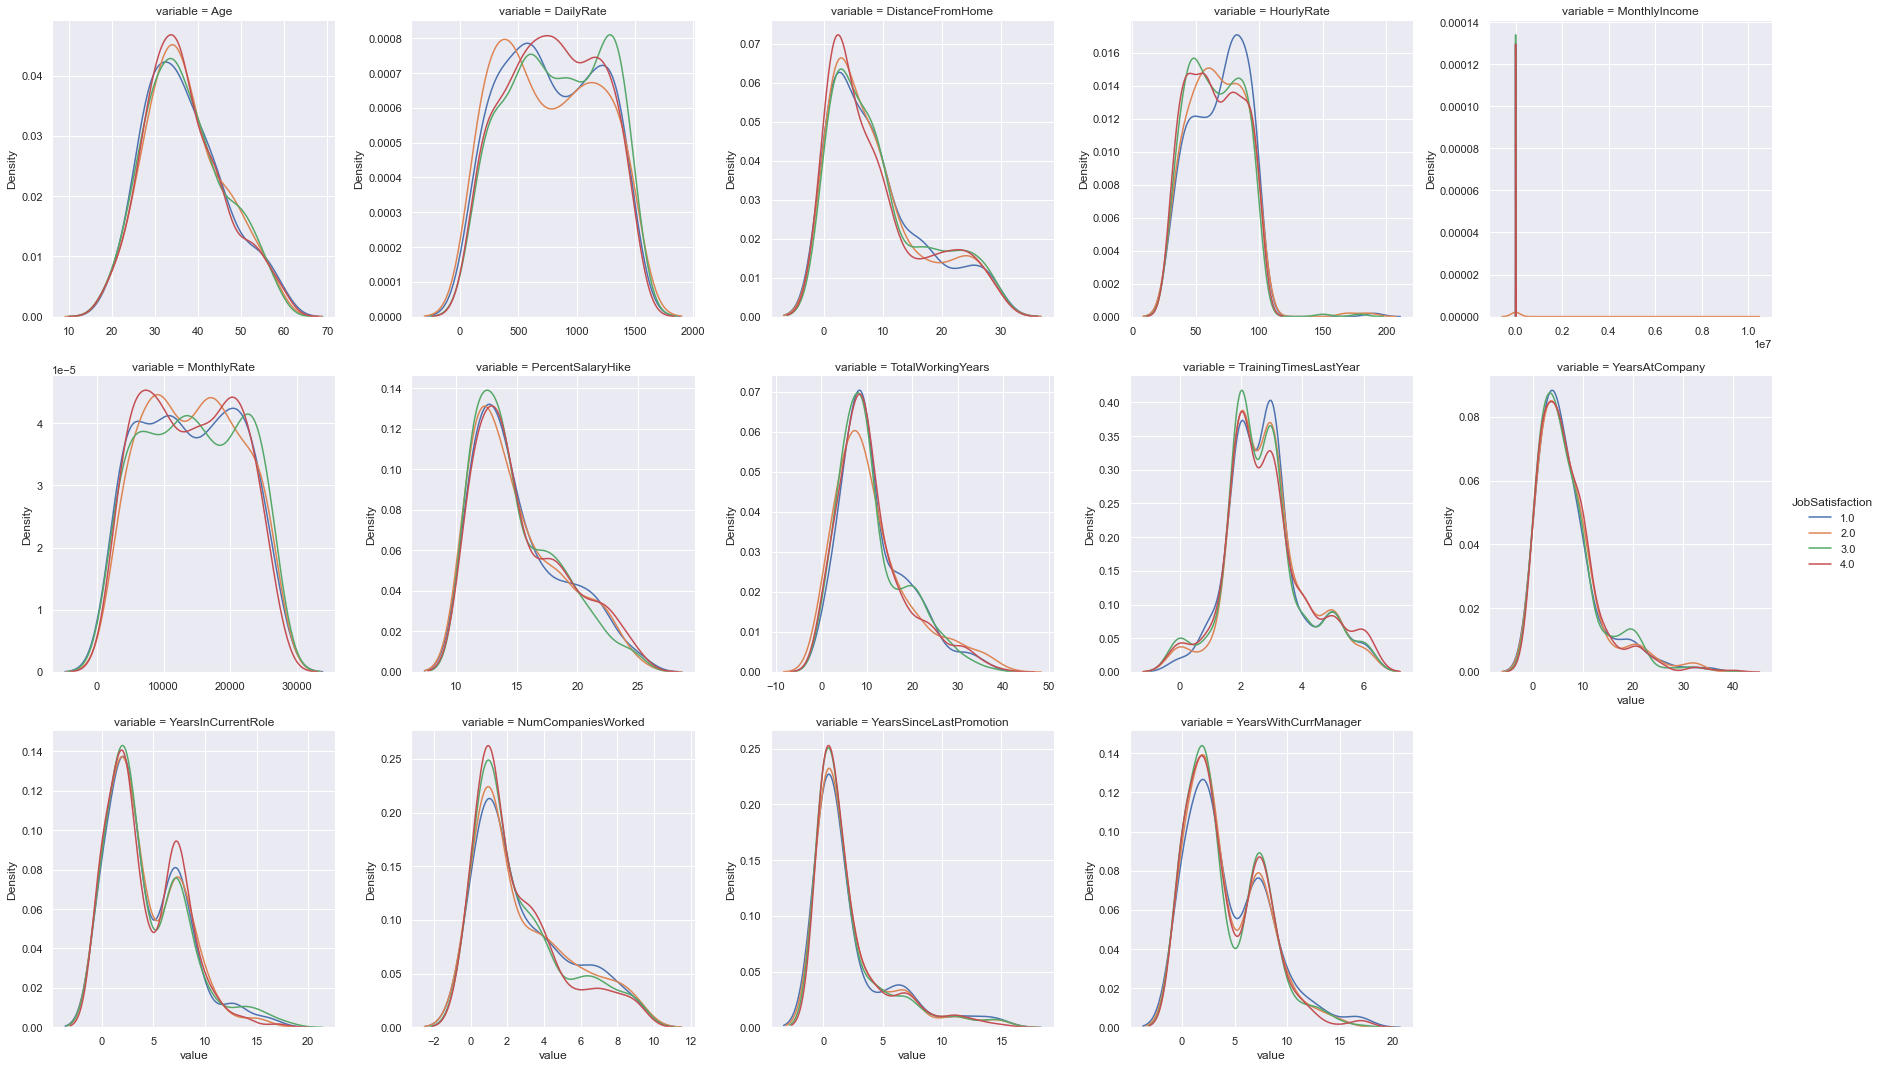

In [221]:
#Análisis bivariado de las variables númericas con respecto al JobSatisfaction
NumericBVData = NumericBV.melt(id_vars=['JobSatisfaction'])
NumericDataGD = sns.FacetGrid(NumericBVData, col='variable',sharex=False,sharey=False,dropna=True,size=5,col_wrap=5,  hue='JobSatisfaction' )
histPlot=NumericDataGD.map(sns.kdeplot,'value' )
NumericDataGD.add_legend()
plt.show()

En las variables númericas se observa que no hay diferencias siginificativas con respecto a la variación de la calificación del trabajo

# Variables categóricas tipo Object a catergórica númerica

In [222]:
#Se reemplazan las variables categóricas por valores númericos
df3['BusinessTravel']=df3['BusinessTravel'].map({'Travel_Rarely':0, 'Travel_Frequently':1,'Non-Travel':2})
df3['Department']=df3['Department'].map({'Sales':0, 'Research & Development':1,'Human Resources':2})
df3['Gender']=df3['Gender'].map({'Female':0, 'Male':1})
df3['Attrition']=df3['Attrition'].map({'Yes':0, 'No':1})
df3['MaritalStatus']=df3['MaritalStatus'].map({'Single':0, 'Married':1,'Divorced':2})
df3['OverTime']=df3['OverTime'].map({'Yes':0, 'No':1})
df3['EducationField']=df3['EducationField'].map({'Life Sciences':0, 'Other':1, 'Medical':2, 'Marketing':3, 'Technical Degree':4,'Human Resources':5})
df3['JobRole']=df3['JobRole'].map({'Sales Executive':0, 'Research Scientist':1, 'Laboratory Technician':2,
 'Manufacturing Director':3, 'Healthcare Representative':4, 'Manager':5,
 'Sales Representative':6, 'Research Director':7, 'Human Resources':8})

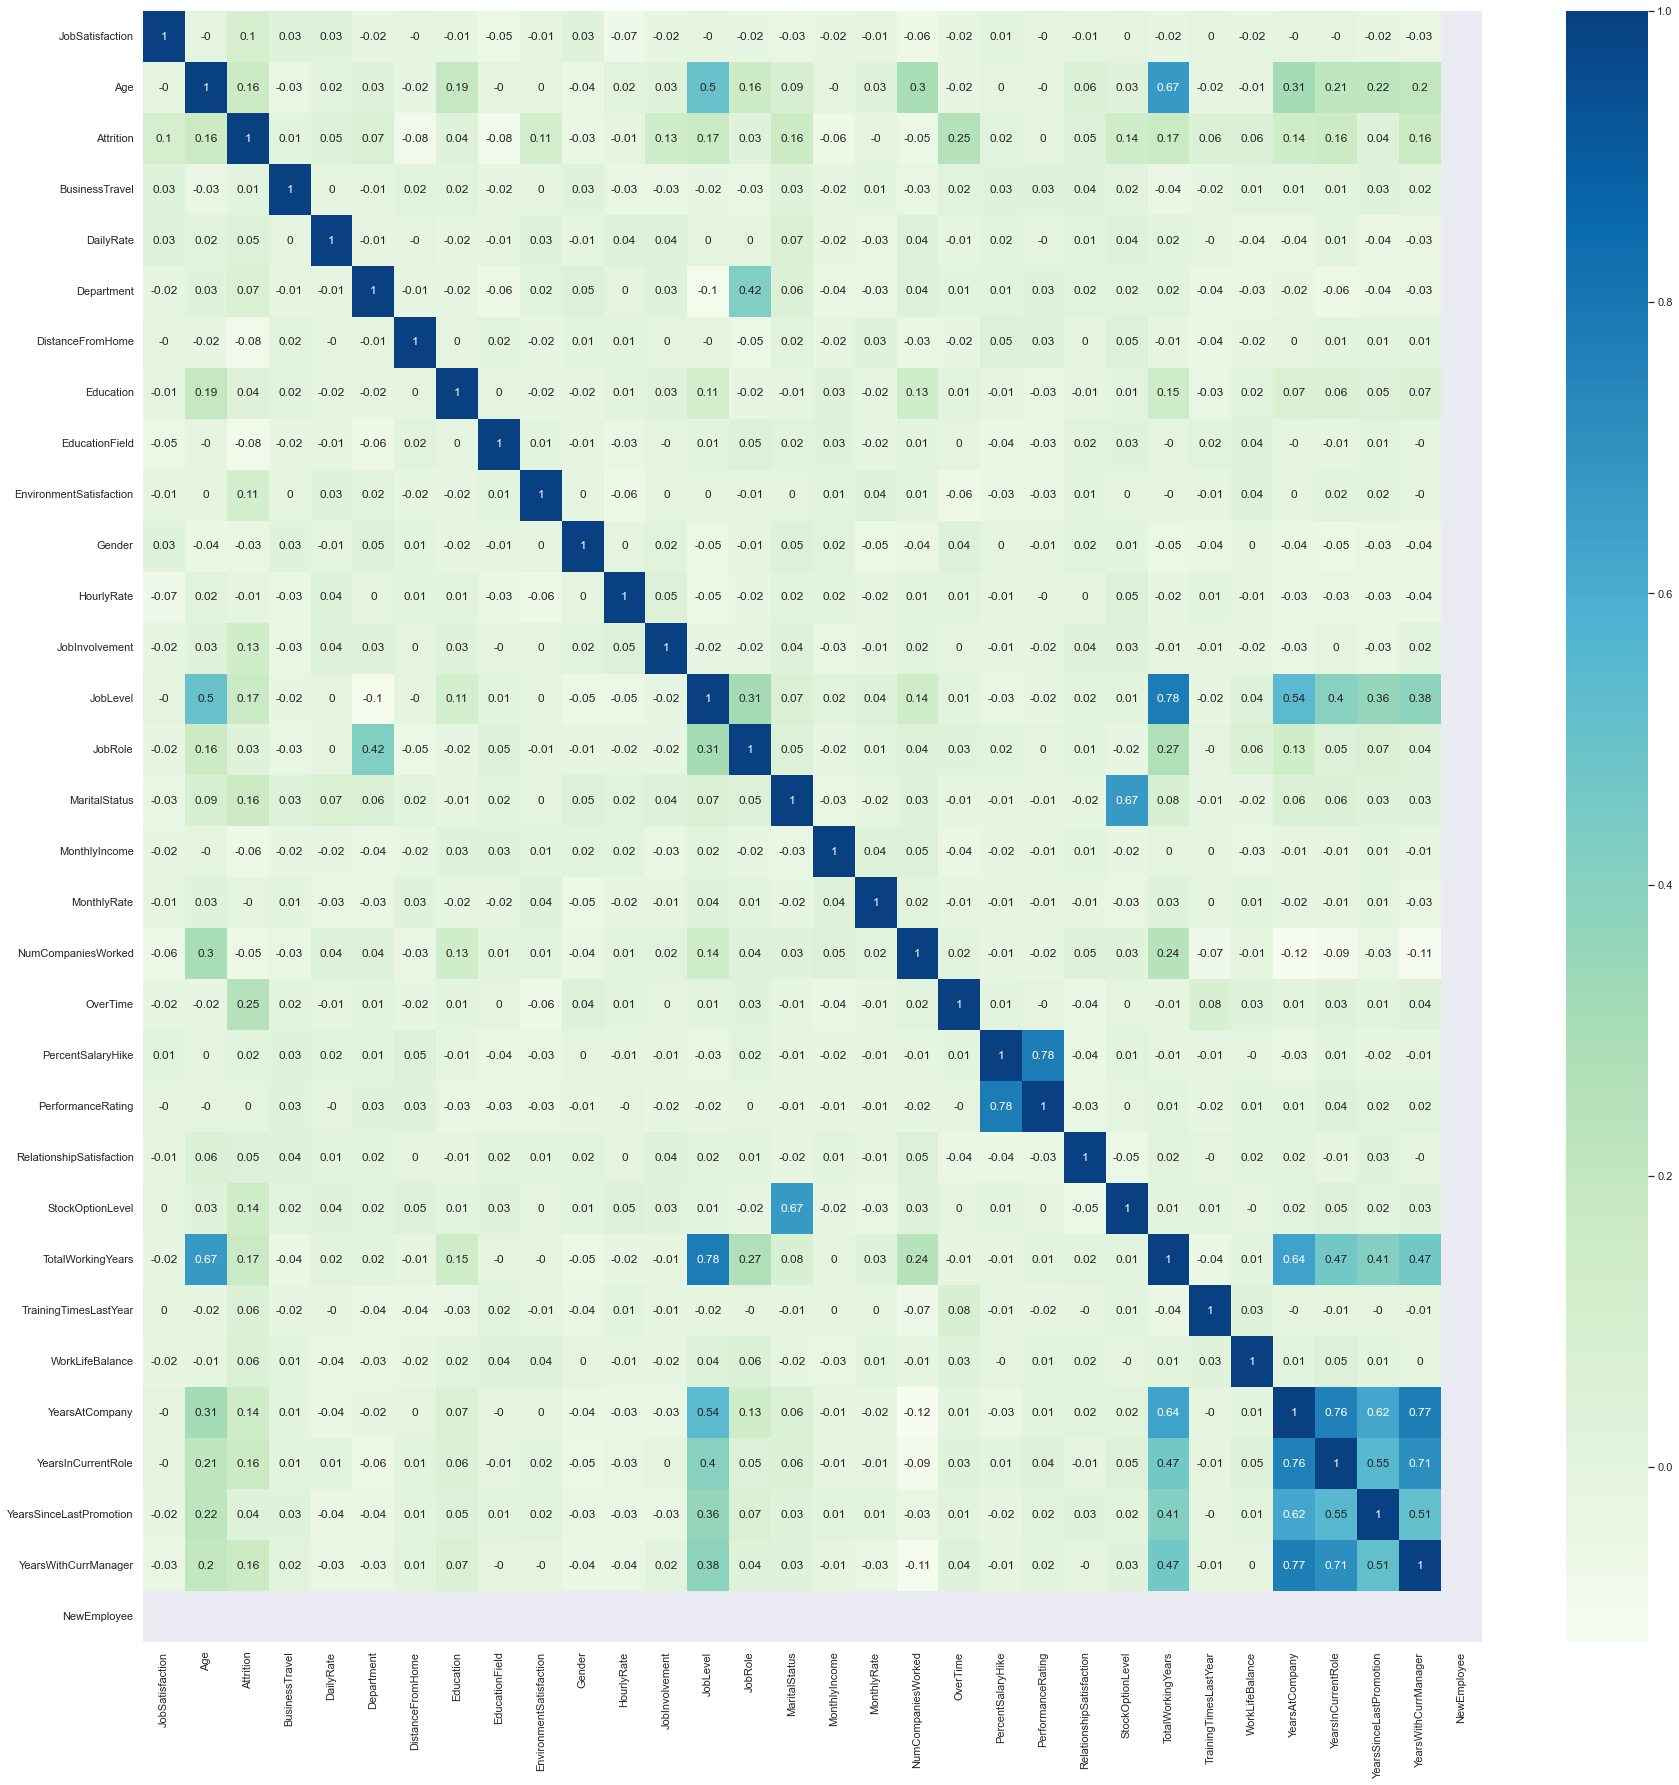

In [223]:
#Correlación de las variables 
plt.figure(figsize=(30,30))
sns.heatmap(round(df3.corr(),2),annot=True,mask=None,cmap='GnBu')
plt.show()

In [224]:
df4=dfp.copy()
df4

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
0,4.0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,0,8,0,1,6,4,0,5,0
1,2.0,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,1,10,3,3,10,7,1,7,0
2,3.0,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,0,7,3,3,0,0,0,0,0
3,3.0,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,0,8,3,3,8,7,3,0,0
4,2.0,35.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,3.0,28.0,No,Travel_Frequently,994,Sales,9,3,Life Sciences,4,...,4,0,9,0,3,9,8,1,7,0
1499,4.0,31.0,No,Travel_Frequently,721,Research & Development,2,2,Medical,4,...,4,0,12,2,3,12,8,3,7,0
1501,4.0,36.0,No,Non-Travel,845,Sales,1,5,Medical,4,...,2,0,7,6,3,1,0,0,0,0
1503,1.0,27.0,No,Travel_Rarely,1302,Research & Development,19,3,Other,4,...,1,2,7,3,3,7,7,0,7,0


# Entrenamiento del modelo

## Primera alternativa

In [225]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, 
    f1_score, precision_recall_curve, accuracy_score,
)
from sklearn.model_selection import (
    cross_val_predict, cross_val_score, train_test_split,
    GridSearchCV
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.svm import SVC
import xgboost

### Seleccionar atributos numéricos y categóricos

In [226]:
numerical_attrs = df4.select_dtypes(include=np.number).columns.to_list()
categorical_attrs = df4.select_dtypes(include='object').columns.to_list()
assert all([col in numerical_attrs + categorical_attrs for col in df4.columns])

### Separar una parte del conjunto de datos para el conjunto de prueba
Evite la indagación de datos muestreando un conjunto de prueba y dejándolo a un lado hasta el paso de prueba.

In [227]:
train_df, test_df = train_test_split(df4, test_size=0.2, random_state=314, stratify=df4.Attrition)
print('Shapes:', train_df.shape, test_df.shape)

Shapes: (1192, 32) (299, 32)


In [228]:
# Comenzar a observar la distribución de la variable objetivo – JobSatisfaction
train_df.JobSatisfaction.value_counts(normalize=True, dropna=False)

4.0    0.310403
3.0    0.305369
1.0    0.197148
2.0    0.187081
Name: JobSatisfaction, dtype: float64

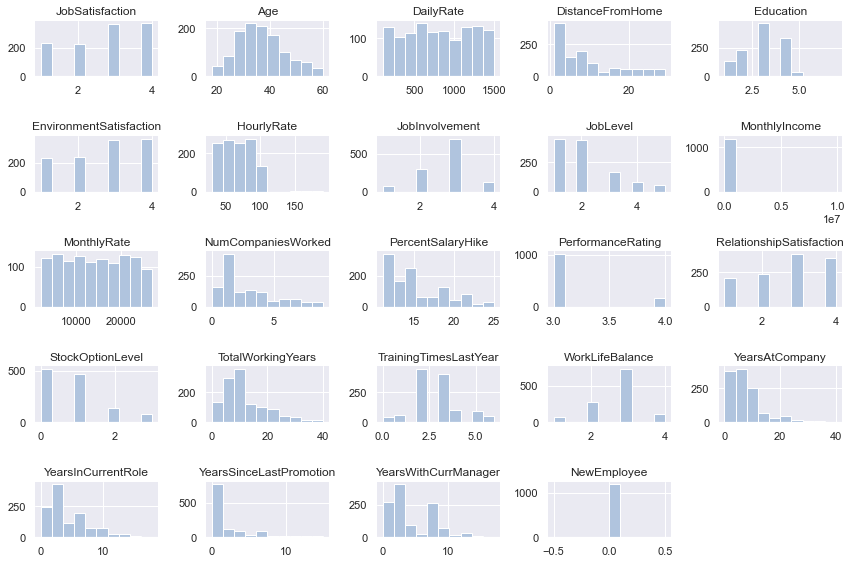

In [229]:
train_df[numerical_attrs].hist(color='lightsteelblue', figsize=(12, 8))
sns.despine(left=True)
plt.tight_layout()

### Estudiar la correlación entre atributos

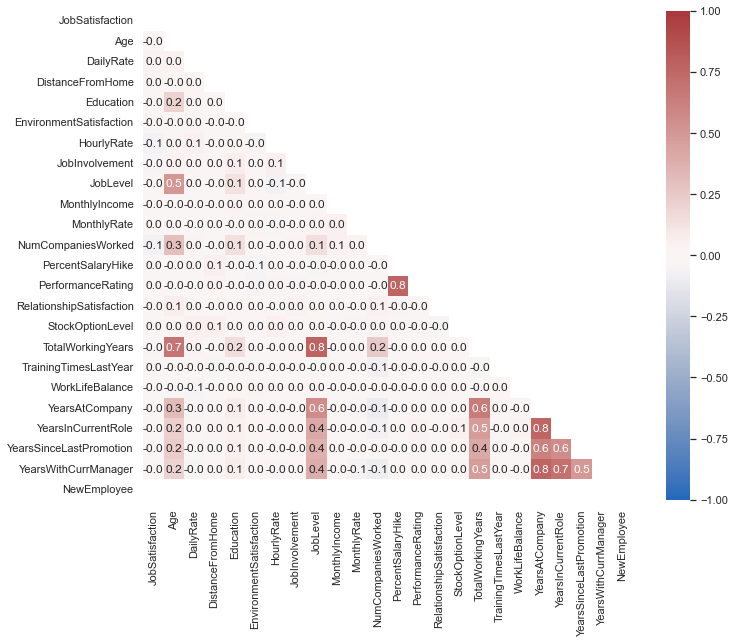

In [230]:
corr_matrix = train_df[numerical_attrs].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 9))
    ax = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, square=True, annot=True, fmt=".1f", cmap='vlag')

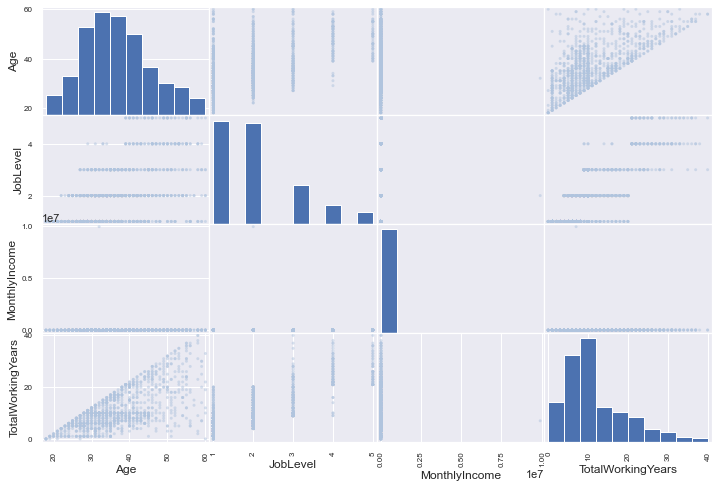

In [232]:
attributes = ['Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears']
scatter_matrix(train_df[attributes], color='lightsteelblue', figsize=(12, 8));

Podemos observar un par de cosas de la matriz de dispersión anterior:
- Los niveles de trabajo más altos se asocian con salarios y edades más altos. Esto indica potencialmente que el nivel de trabajo representa el nivel de antigüedad.
- Los salarios altos tienden a ir a los empleados con mucha experiencia laboral.

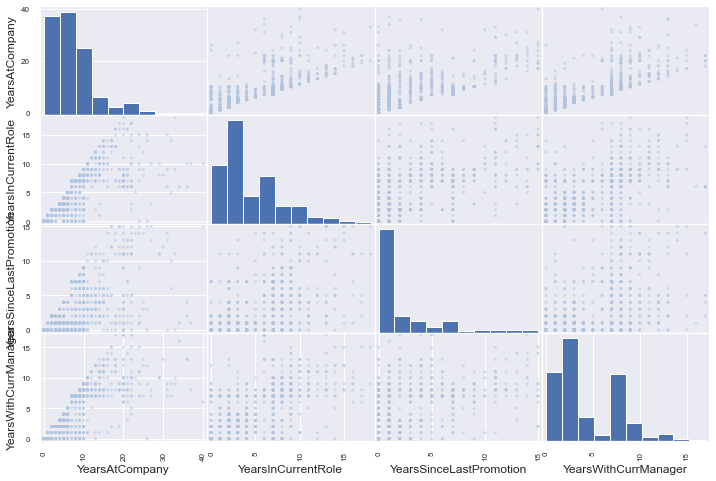

In [233]:
# Analyse highly correlated attributes
attributes = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
scatter_matrix(train_df[attributes], color='lightsteelblue', figsize=(12, 8));

Como se observa en la matriz de correlación, existen asociaciones altamente positivas entre estos atributos. Podemos extraer las siguientes observaciones:
- Relación entre `YearsAtCompany` y `YearsInCurrentRole`: Muchas personas permanecen en el mismo rol durante algún tiempo.
- Relación entre `YearsAtCompany` y `YearsWithCurrManager`: Existe una tendencia directamente proporcional con un techo considerable a los 7-8 años con el gerente actual

In [235]:
X_train = train_df.drop(columns='JobSatisfaction')
y_train = train_df['JobSatisfaction'].copy()

### Selección de características
#### Eliminar atributos innecesarios

In [236]:
removed_attrs = set(['Gender','JobSatisfaction','NewEmployee'])

categorical_attrs = list(set(categorical_attrs) - removed_attrs)
numerical_attrs = list(set(numerical_attrs) - removed_attrs)

X_train = X_train[categorical_attrs+numerical_attrs].copy()
X_train.shape

(1192, 29)

Vale la pena señalar que se elimina el género, ya que la representación excesiva de hombres en el conjunto de datos podría introducir sesgos sexuales en los resultados.

In [237]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_train.sum() == train_df[train_df.Attrition=='Yes'].shape[0]

False

In [238]:
transformation_pipeline = ColumnTransformer([
    ('num', StandardScaler(), numerical_attrs),
    ('cat', OneHotEncoder(), categorical_attrs),
], remainder='drop')
X_train = transformation_pipeline.fit_transform(X_train)

In [239]:
# Observe the transformed data
feature_names = np.array([])
for transf in transformation_pipeline.transformers_:
        feature_names = np.append(feature_names, transf[1].get_feature_names_out())

pd.DataFrame(X_train, columns=feature_names)

,JobLevel,YearsInCurrentRole,YearsWithCurrManager,TrainingTimesLastYear,MonthlyRate,JobInvolvement,PercentSalaryHike,TotalWorkingYears,MonthlyIncome,Education,...,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Attrition_No,Attrition_Yes
0,2.705697,-0.609156,-0.874940,-0.610411,0.297908,0.364441,-1.141210,1.274305,0.012620,2.006650,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.036035,-1.157166,1.088615,-0.610411,-0.100508,0.364441,-0.865618,-0.154765,-0.035314,-0.893827,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.949946,-0.609156,-0.594432,-1.396166,1.330704,-1.023462,-0.865618,-0.414596,-0.038876,0.072999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-0.036035,-0.335151,-0.313924,-0.610411,1.322567,-1.023462,-0.590026,-0.154765,-0.037174,-0.893827,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.036035,1.856891,1.369123,0.961100,-0.615082,0.364441,-0.038842,1.014474,-0.034697,0.072999,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,2.705697,-1.157166,0.527599,0.175345,1.384153,0.364441,-1.141210,2.703375,0.016866,1.039824,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1188,0.877876,-0.061145,-1.155447,-0.610411,0.418555,-1.023462,-0.865618,-0.284680,-0.019492,1.039824,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1189,-0.949946,-0.609156,-0.594432,0.961100,0.419397,0.364441,0.787935,-0.804342,-0.039172,-1.860653,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1190,-0.949946,-1.157166,-1.155447,0.175345,-1.481357,0.364441,1.063527,-1.324004,-0.041251,0.072999,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Modelling

In [240]:
def display_results(y_train, y_train_pred):
    """
    Prints the confusion matrix along with performance scores

    Parameters
    ---
    y_train: 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_train_pred: 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.


    Returns
    ---
    None
    """
    print('Confusion matrix\n', confusion_matrix(y_train, y_train_pred))
    print('Accuracy:', accuracy_score(y_train, y_train_pred))
    print('Precision:', precision_score(y_train, y_train_pred,average='micro'))
    print('Recall:', recall_score(y_train, y_train_pred,average='micro'))
    print('F1-score:', f1_score(y_train, y_train_pred,average='micro'))

In [241]:
y_train_pred.shape

(1202,)

In [242]:
log_reg = LogisticRegression()
y_train_pred = cross_val_predict(log_reg, X_train, y_train, cv=10)
display_results(y_train, y_train_pred)

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Julian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Confusion matrix
 [[ 32  20  87  96]
 [ 23  14  93  93]
 [ 44  20 146 154]
 [ 40  20 157 153]]
Accuracy: 0.28942953020134227
Precision: 0.28942953020134227
Recall: 0.28942953020134227
F1-score: 0.28942953020134227


C:\Users\Julian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Julian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [243]:
rf = RandomForestClassifier(random_state=314)
y_train_pred = cross_val_predict(rf, X_train, y_train, cv=10)
display_results(y_train, y_train_pred)

Confusion matrix
 [[ 16  19  98 102]
 [ 25  10  89  99]
 [ 23  15 173 153]
 [ 30  21 153 166]]
Accuracy: 0.3062080536912752
Precision: 0.3062080536912752
Recall: 0.3062080536912752
F1-score: 0.3062080536912752


In [244]:
svc = SVC(random_state=314)
y_train_pred = cross_val_predict(svc, X_train, y_train, cv=10)
display_results(y_train, y_train_pred)

Confusion matrix
 [[  3   6 108 118]
 [  3   3 105 112]
 [  3   2 192 167]
 [ 11   4 172 183]]
Accuracy: 0.3196308724832215
Precision: 0.3196308724832215
Recall: 0.3196308724832215
F1-score: 0.3196308724832215


In [245]:
xgb = xgboost.XGBClassifier(objective='binary:logistic')
y_train_pred = cross_val_predict(xgb, X_train, y_train, cv=10)
display_results(y_train, y_train_pred)

Confusion matrix
 [[ 33  26  90  86]
 [ 32  34  81  76]
 [ 40  45 158 121]
 [ 42  44 142 142]]
Accuracy: 0.30788590604026844
Precision: 0.30788590604026844
Recall: 0.30788590604026844
F1-score: 0.30788590604026844


In [246]:
DTC=DecisionTreeClassifier()
y_train_pred = cross_val_predict(DTC, X_train, y_train, cv=10)
display_results(y_train, y_train_pred)

Confusion matrix
 [[ 54  44  66  71]
 [ 45  45  75  58]
 [ 80  57 124 103]
 [ 63  70 106 131]]
Accuracy: 0.29697986577181207
Precision: 0.29697986577181207
Recall: 0.29697986577181207
F1-score: 0.29697986577181207


Teniendo en cuenta los parámetros estándar, el de RandomForest es el modelo con la mayor *precisión* y *f1-score*.

## Afinar el modelo

In [253]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 2)]
max_depth.append(None)
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              }
print(random_grid)

{'n_estimators': [200, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 110, None]}


In [254]:
grid_search_log_reg = GridSearchCV(RandomForestClassifier(), random_grid, cv=10, scoring='f1', verbose=1)
grid_search_log_reg.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_suppo

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_suppo

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_suppo

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_suppo

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_suppo

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_suppo

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_suppo

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_suppo

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_suppo

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_suppo

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_suppo

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_suppo

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_suppo

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_suppo

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_suppo

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_suppo

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_suppo

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_suppo

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_suppo

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_suppo

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 110, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 2000]},
             scoring='f1', verbose=1)

In [255]:
grid_search_log_reg.best_params_

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}

In [256]:
y_train_pred = cross_val_predict(grid_search_log_reg.best_estimator_, X_train, y_train, cv=10)
display_results(y_train, y_train_pred)

Confusion matrix
 [[  7   9 107 112]
 [ 12   3  94 114]
 [ 11   7 179 167]
 [  6  10 140 214]]
Accuracy: 0.33808724832214765
Precision: 0.33808724832214765
Recall: 0.33808724832214765
F1-score: 0.33808724832214765


Se observa que a pesar de realizar validaciones cruzadas y buscar los hiperparámetros que mejor se ajusten, el F1 score sigue siendo muy bajo. Por ende, a conitnuación se buscarán nuevas alternativas-

# Segunda alternativa

In [377]:
df5=df4.copy()
df5=df5.reset_index()
df5

,index,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
0,0,4.0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,...,1,0,8,0,1,6,4,0,5,0
1,1,2.0,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,...,4,1,10,3,3,10,7,1,7,0
2,2,3.0,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,...,2,0,7,3,3,0,0,0,0,0
3,3,3.0,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,...,3,0,8,3,3,8,7,3,0,0
4,4,2.0,35.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,1498,3.0,28.0,No,Travel_Frequently,994,Sales,9,3,Life Sciences,...,4,0,9,0,3,9,8,1,7,0
1487,1499,4.0,31.0,No,Travel_Frequently,721,Research & Development,2,2,Medical,...,4,0,12,2,3,12,8,3,7,0
1488,1501,4.0,36.0,No,Non-Travel,845,Sales,1,5,Medical,...,2,0,7,6,3,1,0,0,0,0
1489,1503,1.0,27.0,No,Travel_Rarely,1302,Research & Development,19,3,Other,...,1,2,7,3,3,7,7,0,7,0


In [378]:
#Se jaustan los valores de cada uno de los deparatemtos según su role
deps=df5['Department'].unique()
deps

for i in deps:  
  print("Department Name:",[i])
  values=df5.loc[df5['Department'] == i]['JobRole'].unique()
  print("Values are:",values)
  print("\n")

Department Name: ['Sales']
Values are: ['Sales Executive' 'Manager' 'Sales Representative']


Department Name: ['Research & Development']
Values are: ['Research Scientist' 'Laboratory Technician' 'Manufacturing Director'
 'Healthcare Representative' 'Research Director' 'Manager']


Department Name: ['Human Resources']
Values are: ['Human Resources' 'Manager']




Gerente es el rol común en todos los departamentos. Por lo tanto, se puede eliminar el cambio de nombre del Gerente con los respectivos Departamentos y la columna Departamento

In [379]:
#modifying the Manager role which is commong in all departments
df5.loc[(df5['Department']=='Research & Development') & (df5['JobRole']=='Manager'),'JobRole']='Research & Development_Manager'
df5.loc[(df5['Department']=='Sales') & (df5['JobRole']=='Manager'),'JobRole']='Sales_Manager'
df5.loc[(df5['Department']=='Human Resources') & (df5['JobRole']=='Manager'),'JobRole']='Human Resources_Manager'

In [380]:
#displaying after update
deps=df5['Department'].unique()
deps

for i in deps:  
  print("Department Name:",[i])
  values=df5.loc[df5['Department'] == i]['JobRole'].unique()
  print("Values are:",values)
  print("\n")

#droping deparment field
df5.drop('Department',axis=1,inplace=True)

Department Name: ['Sales']
Values are: ['Sales Executive' 'Sales_Manager' 'Sales Representative']


Department Name: ['Research & Development']
Values are: ['Research Scientist' 'Laboratory Technician' 'Manufacturing Director'
 'Healthcare Representative' 'Research Director'
 'Research & Development_Manager']


Department Name: ['Human Resources']
Values are: ['Human Resources' 'Human Resources_Manager']




Se elimina la columna de departamento. La columna Jobrole es suficiente ahora

In [381]:
df5.drop(['HourlyRate','MonthlyRate','TrainingTimesLastYear','PercentSalaryHike','YearsAtCompany','JobLevel','NewEmployee'],axis=1,inplace=True)
df5

,index,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,4.0,41.0,Yes,Travel_Rarely,1102,1,2,Life Sciences,2,...,8,Yes,3,1,0,8,1,4,0,5
1,1,2.0,49.0,No,Travel_Frequently,279,8,1,Life Sciences,3,...,1,No,4,4,1,10,3,7,1,7
2,2,3.0,37.0,Yes,Travel_Rarely,1373,2,2,Other,4,...,6,Yes,3,2,0,7,3,0,0,0
3,3,3.0,33.0,No,Travel_Frequently,1392,3,4,Life Sciences,4,...,1,Yes,3,3,0,8,3,7,3,0
4,4,2.0,35.0,No,Travel_Rarely,591,2,1,Medical,1,...,9,No,3,4,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,1498,3.0,28.0,No,Travel_Frequently,994,9,3,Life Sciences,4,...,1,No,3,4,0,9,3,8,1,7
1487,1499,4.0,31.0,No,Travel_Frequently,721,2,2,Medical,4,...,3,No,4,4,0,12,3,8,3,7
1488,1501,4.0,36.0,No,Non-Travel,845,1,5,Medical,4,...,4,No,3,2,0,7,3,0,0,0
1489,1503,1.0,27.0,No,Travel_Rarely,1302,19,3,Other,4,...,1,No,3,1,2,7,3,7,0,7


Del análisis bivariado, vemos que no hay ninguna dependencia de estas variables en la tasa de deserción. Por lo tanto, eliminar estas variables

'Tarifa por hora', 'Tarifa mensual', 'Tiempos de capacitación del último año', 'Aumento porcentual del salario', 'Años en la empresa', 'Nivel de trabajo'

In [382]:
#selecting only categorical variables for Label encoding
CatCol = df5.select_dtypes(include = "object").columns
print(CatCol)
#instantiating LabelEncoder() object
le = LabelEncoder()

#Label encoding the categorical columns by converting them into string type
for feat in CatCol:
    df5[feat] = le.fit_transform(df5[feat].astype(str))

Index(['Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')


In [383]:
df5

,index,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,4.0,41.0,1,2,1102,1,2,1,2,...,8,1,3,1,0,8,1,4,0,5
1,1,2.0,49.0,0,1,279,8,1,1,3,...,1,0,4,4,1,10,3,7,1,7
2,2,3.0,37.0,1,2,1373,2,2,4,4,...,6,1,3,2,0,7,3,0,0,0
3,3,3.0,33.0,0,1,1392,3,4,1,4,...,1,1,3,3,0,8,3,7,3,0
4,4,2.0,35.0,0,2,591,2,1,3,1,...,9,0,3,4,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,1498,3.0,28.0,0,1,994,9,3,1,4,...,1,0,3,4,0,9,3,8,1,7
1487,1499,4.0,31.0,0,1,721,2,2,3,4,...,3,0,4,4,0,12,3,8,3,7
1488,1501,4.0,36.0,0,0,845,1,5,3,4,...,4,0,3,2,0,7,3,0,0,0
1489,1503,1.0,27.0,0,2,1302,19,3,4,4,...,1,0,3,1,2,7,3,7,0,7


In [384]:
#combining MaritalStatus and StockOptionLevel into one column
scaler = StandardScaler()
X_train_new = scaler.fit_transform(df5[['MaritalStatus','StockOptionLevel']])
pca = PCA(n_components=1)
data_transformed = pca.fit_transform(X_train_new)
print("Explained Variance Ratio:",pca.explained_variance_ratio_)
data_transformed = pd.DataFrame(data_transformed, columns = ['Marital_stock'])
df5=pd.concat([df5,data_transformed], axis=1)

Explained Variance Ratio: [0.8330197]


MaritalStatus y StockOptionLevel están correlacionados (0,83). El 83.3% de la variación será explicada por la nuieva columna. Por ello, transformándolo en una sola columna.

In [385]:
data_transformed.shape
df6

,index,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Marital_stock
0,0,4.0,41.0,1,2,1102,1,2,1,2,...,1,3,1,0,8,1,4,0,5,-1.520728
1,1,2.0,49.0,0,1,279,8,1,1,3,...,0,4,4,1,10,3,7,1,7,0.270001
2,2,3.0,37.0,1,2,1373,2,2,4,4,...,1,3,2,0,7,3,0,0,0,-1.520728
3,3,3.0,33.0,0,1,1392,3,4,1,4,...,1,3,3,0,8,3,7,3,0,-0.558578
4,4,2.0,35.0,0,2,591,2,1,3,1,...,0,3,4,1,6,3,2,2,2,0.270001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,1498,3.0,28.0,0,1,994,9,3,1,4,...,0,3,4,0,9,3,8,1,7,-1.520728
1487,1499,4.0,31.0,0,1,721,2,2,3,4,...,0,4,4,0,12,3,8,3,7,-1.520728
1488,1501,4.0,36.0,0,0,845,1,5,3,4,...,0,3,2,0,7,3,0,0,0,-1.520728
1489,1503,1.0,27.0,0,2,1302,19,3,4,4,...,0,3,1,2,7,3,7,0,7,2.060731


In [386]:
scaler = StandardScaler()
X_train_new = scaler.fit_transform(df5[['TotalWorkingYears','Age','MonthlyIncome','YearsInCurrentRole','YearsWithCurrManager']])
pca = PCA(n_components=5)
data_transformed = pca.fit_transform(X_train_new)
print("Explained Variance Ratio:",pca.explained_variance_ratio_)
print("Components:",pca.components_)
varianceRatio=pca.explained_variance_ratio_

Explained Variance Ratio: [0.4757722  0.21256789 0.19991453 0.05798225 0.05376313]
Components: [[ 0.5491892   0.41785324 -0.00805858  0.51325439  0.51019102]
 [ 0.34417013  0.67363483  0.07818649 -0.45321277 -0.46502483]
 [-0.01629603 -0.05444573  0.9968725   0.03827565  0.03937381]
 [-0.15813539  0.11648128  0.00179449  0.72767827 -0.65719588]
 [-0.74475887  0.59588804  0.00799579  0.0136904   0.3000005 ]]


Text(0, 0.5, 'Variance')

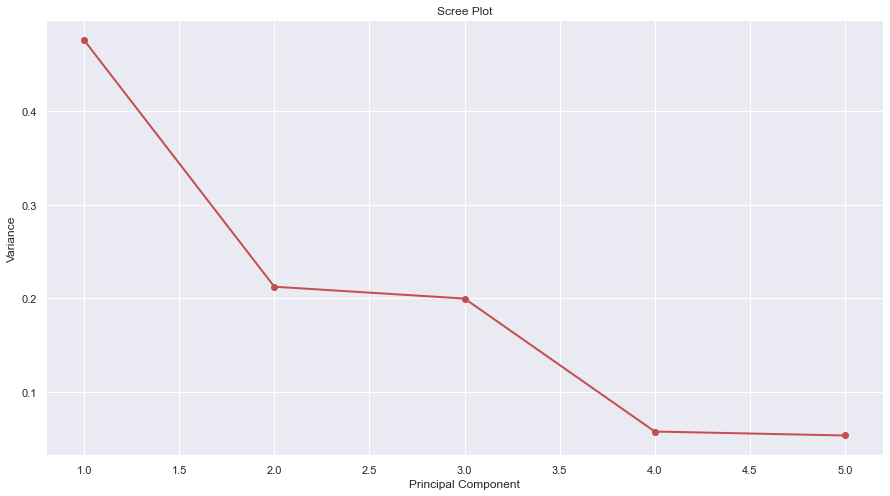

In [387]:
sing_vals=[1,2,3,4,5]
plt.plot(sing_vals, varianceRatio, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance')

In [388]:
scaler = StandardScaler()
X_train_new = scaler.fit_transform(df5[['TotalWorkingYears','Age','MonthlyIncome','YearsInCurrentRole','YearsWithCurrManager']])
pca = PCA(n_components=2)
data_transformed = pca.fit_transform(X_train_new)
data_transformed = pd.DataFrame(data_transformed, columns = ['Age&CompanyExp','ExperienceVsIncome'])
df5=pd.concat([df5,data_transformed],axis=1)

Aquí se agregan 2 columnas Age&CompanyExp', 'ExperienceVsIncome'.

In [389]:
df5.drop(['MaritalStatus','StockOptionLevel'],axis=1,inplace=True)
df5.drop(['TotalWorkingYears','Age','MonthlyIncome','YearsInCurrentRole','YearsWithCurrManager','index'],axis=1,inplace=True)

Descartar las columnas duplicadas después de la transformación

In [390]:
print(df5.shape)
df5.columns

(1491, 20)


Index(['JobSatisfaction', 'Attrition', 'BusinessTravel', 'DailyRate',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'WorkLifeBalance',
       'YearsSinceLastPromotion', 'Marital_stock', 'Age&CompanyExp',
       'ExperienceVsIncome'],
      dtype='object')

In [391]:
#Hacer una copia de seguridad del conjunto de datos imputados
df5Imputed=df5.copy()

In [392]:
#check the data after label encoding
df5.sort_index().head()

,JobSatisfaction,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,YearsSinceLastPromotion,Marital_stock,Age&CompanyExp,ExperienceVsIncome
0,4.0,1,2,1102,1,2,1,2,0,3,8,8,1,3,1,1,0,-1.520728,0.056569,0.067211
1,2.0,0,1,279,8,1,1,3,1,2,7,1,0,4,4,3,1,0.270001,1.275611,0.108751
2,3.0,1,2,1373,2,2,4,4,1,2,3,6,1,3,2,3,0,-1.520728,-1.479594,0.879755
3,3.0,0,1,1392,3,4,1,4,0,3,7,1,1,3,3,3,3,-0.558578,-0.598306,-0.248085
4,2.0,0,2,591,2,1,3,1,1,3,3,9,0,3,4,3,2,0.270001,-1.071913,0.177097


In [393]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [396]:
#comprobando la presencia de multicolinealidadvif=pd.DataFrame()
vif=pd.DataFrame()
vif['Features']=df5.columns
vif['VIF']=[variance_inflation_factor(df5.values,i) for i in range(df5.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
13,PerformanceRating,38.11
15,WorkLifeBalance,15.04
9,JobInvolvement,14.44
5,Education,8.90
14,RelationshipSatisfaction,7.14
7,EnvironmentSatisfaction,7.13
0,JobSatisfaction,7.03
2,BusinessTravel,6.56
3,DailyRate,4.92
10,JobRole,4.65


Los datos aún muestran multicolinealidad. 8 variables tienen vif >5

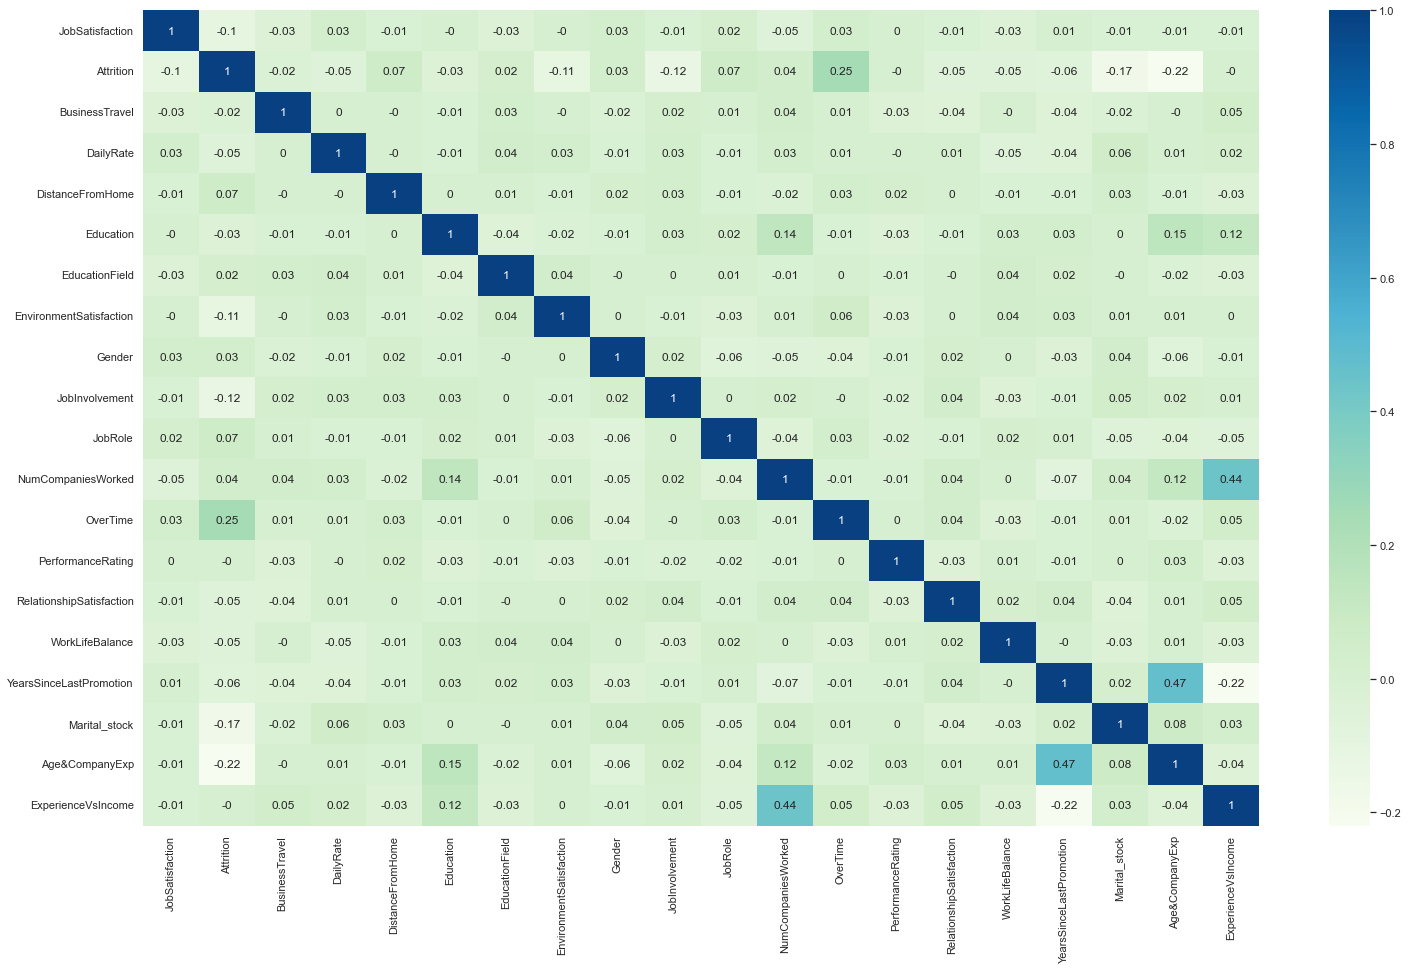

In [397]:
#plottting diagrama correlacional comprobación de correlaciones y dependencias para imputación
plt.figure(figsize=(25,15))
sns.heatmap(round(df5.corr(method='spearman'),2),annot=True,mask=None,cmap='GnBu')
plt.show()

In [398]:
#taking backup of data to create models without treating outliers
DFLogisticOL=df5.copy()
DFLogisticOL.shape

(1491, 20)

In [399]:
DFLogisticOL.head()

,JobSatisfaction,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,YearsSinceLastPromotion,Marital_stock,Age&CompanyExp,ExperienceVsIncome
0,4.0,1,2,1102,1,2,1,2,0,3,8,8,1,3,1,1,0,-1.520728,0.056569,0.067211
1,2.0,0,1,279,8,1,1,3,1,2,7,1,0,4,4,3,1,0.270001,1.275611,0.108751
2,3.0,1,2,1373,2,2,4,4,1,2,3,6,1,3,2,3,0,-1.520728,-1.479594,0.879755
3,3.0,0,1,1392,3,4,1,4,0,3,7,1,1,3,3,3,3,-0.558578,-0.598306,-0.248085
4,2.0,0,2,591,2,1,3,1,1,3,3,9,0,3,4,3,2,0.270001,-1.071913,0.177097


In [400]:
#Setting the target and independent variables
y = DFLogisticOL.pop('JobSatisfaction')
X=DFLogisticOL

In [401]:
DFLogisticOL.sort_index(inplace=True)
DFLogisticOL.head()

,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,YearsSinceLastPromotion,Marital_stock,Age&CompanyExp,ExperienceVsIncome
0,1,2,1102,1,2,1,2,0,3,8,8,1,3,1,1,0,-1.520728,0.056569,0.067211
1,0,1,279,8,1,1,3,1,2,7,1,0,4,4,3,1,0.270001,1.275611,0.108751
2,1,2,1373,2,2,4,4,1,2,3,6,1,3,2,3,0,-1.520728,-1.479594,0.879755
3,0,1,1392,3,4,1,4,0,3,7,1,1,3,3,3,3,-0.558578,-0.598306,-0.248085
4,0,2,591,2,1,3,1,1,3,3,9,0,3,4,3,2,0.270001,-1.071913,0.177097


In [402]:
#splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.25,random_state=23)

In [403]:
# checking the spread of overall split
print("Independent variables Train dataset shape",X_train.shape)
print("Target dataset shape Train",y_train.shape)
print("Independent variables Test dataset shape",X_test.shape)
print("Test dataset shape Train",y_test.shape)
print("% of data in Train dataset",round((y_train.shape[0]/(y_train.shape[0]+y_test.shape[0]))*100),"%")
print("% of data in Test dataset",round((y_test.shape[0]/(y_train.shape[0]+y_test.shape[0]))*100),"%")

Independent variables Train dataset shape (1118, 19)
Target dataset shape Train (1118,)
Independent variables Test dataset shape (373, 19)
Test dataset shape Train (373,)
% of data in Train dataset 75 %
% of data in Test dataset 25 %


In [405]:
#checking the split wrt to JobSatisfaction
print("JobSatisfaction from TrainDataset\n",y_train.value_counts())
print("\n")
print("JobSatisfaction from TestDataSet\n",y_test.value_counts())

JobSatisfaction from TrainDataset
 4.0    354
3.0    340
1.0    215
2.0    209
Name: JobSatisfaction, dtype: int64


JobSatisfaction from TestDataSet
 4.0    118
3.0    114
1.0     72
2.0     69
Name: JobSatisfaction, dtype: int64


In [406]:
print("Train data Split proportion:\n")
print(round(y_train[y_train==1].value_counts()/y_train.shape[0],2))
print(round(y_train[y_train==0].value_counts()/y_train.shape[0],2))
print("\n")
print("Test data Split proportion:\n")
print(round(y_test[y_test==1].value_counts()/y_test.shape[0],2))
print(round(y_test[y_test==0].value_counts()/y_test.shape[0],2))

Train data Split proportion:

1.0    0.19
Name: JobSatisfaction, dtype: float64
Series([], Name: JobSatisfaction, dtype: float64)


Test data Split proportion:

1.0    0.19
Name: JobSatisfaction, dtype: float64
Series([], Name: JobSatisfaction, dtype: float64)


***Modelo de construcción sin ajuste de hiperparámetros:***

In [413]:
#Creating Logistic regression object
LosgisticWeights={1:0.8}
logModel = LogisticRegression(max_iter=1000,class_weight=LosgisticWeights)

In [414]:
#Fitting the model on Train data
logModel.fit(X_train, y_train)

C:\Users\Julian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={1: 0.8}, max_iter=1000)

In [415]:
#Using LR model to predict on test data
y_pred = logModel.predict(X_test)

In [417]:
#creating confusion matrix for checking performance
print(confusion_matrix(y_test, y_pred))

[[ 3  3 31 35]
 [ 0  0 32 37]
 [ 1  5 48 60]
 [ 1  0 56 61]]


In [425]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [420]:
#printing various metrics.
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.60      0.04      0.08        72
         2.0       0.00      0.00      0.00        69
         3.0       0.29      0.42      0.34       114
         4.0       0.32      0.52      0.39       118

    accuracy                           0.30       373
   macro avg       0.30      0.24      0.20       373
weighted avg       0.30      0.30      0.24       373



*** Búsqueda aleatoria de parámetros de hiperajuste de regresión logística: ***

In [422]:
weights=np.linspace(0.1,1,20)
np.logspace(-4, 4, 20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [434]:
#setting multiple parameters for randomizedGrid search
param_grid = [    
    {# l1, l2, elasticnet(combination of l1,l2) and none- these are the penalty parameters for regularisation
     'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000],#no.of iterations
     'class_weight': [{1: x, 1: 1-x} for x in weights]
    }
]

In [435]:
#Instantiating RandomizedGridSearch Object with Logistic regression model object
randomSearch = RandomizedSearchCV(logModel, param_distributions = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [436]:
#Control hyper tuning parameters for RandomSearch
bestRandom = randomSearch.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Julian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
V

In [437]:
#Displaying the best estimators
bestRandom.best_estimator_

LogisticRegression(C=0.00026366508987303583,
                   class_weight={1: 0.18947368421052635}, max_iter=2500,
                   solver='saga')

In [439]:
#Using LR model to predict on test data
y_pred = bestRandom.best_estimator_.predict(X_test)

In [440]:
#using RandomSearchGrid
print(confusion_matrix(y_test, y_pred))

[[ 0  0 19 53]
 [ 0  0 26 43]
 [ 0  0 37 77]
 [ 0  0 33 85]]


In [441]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        72
         2.0       0.00      0.00      0.00        69
         3.0       0.32      0.32      0.32       114
         4.0       0.33      0.72      0.45       118

    accuracy                           0.33       373
   macro avg       0.16      0.26      0.19       373
weighted avg       0.20      0.33      0.24       373



C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*** Hiperajuste de los parámetros con Grid Search: ***

In [442]:
weights=np.linspace(0.1,1,10)
weights

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [449]:
#setting multiple parameters for randomizedGrid search
param_grid_cv = [    
    {# l1, l2, elasticnet(combination of l1,l2) and none- these are the penalty parameters for regularisation
     'penalty' : ['l2'],
   # 'C' : np.logspace(3, 10, 5),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [300],#no.of iterations
     'class_weight': [{1: x, 1: 1-x} for x in weights]
    }
]

In [450]:
#searching the grid for best hyper parameters
gridSearch = GridSearchCV(logModel, param_grid= param_grid_cv, cv = 2, verbose=True, n_jobs=-1)

In [451]:
#Fitting the gridsearch parameters for logistic model
bestGrid = gridSearch.fit(X_train, y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


C:\Users\Julian\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [452]:
#displaying the best parameters for gridsearch
bestGrid.best_estimator_

LogisticRegression(class_weight={1: 0.5}, max_iter=300, solver='saga')

In [453]:
#predicting on the test dataset
y_pred = bestGrid.best_estimator_.predict(X_test)

In [454]:
#validating performance with confusion matrix
print(confusion_matrix(y_test, y_pred))

[[ 0  0 19 53]
 [ 0  0 27 42]
 [ 0  0 39 75]
 [ 0  0 35 83]]


In [455]:
#displaying the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        72
         2.0       0.00      0.00      0.00        69
         3.0       0.33      0.34      0.33       114
         4.0       0.33      0.70      0.45       118

    accuracy                           0.33       373
   macro avg       0.16      0.26      0.20       373
weighted avg       0.20      0.33      0.24       373



C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Decision Trees:**

In [466]:
#taking backup of data to create decision tree models without treating outliers
TrainDecisionTreeOL=df5.copy()

In [467]:
#Setting the target and independent variables
y = TrainDecisionTreeOL.pop('JobSatisfaction')
X=TrainDecisionTreeOL

***Buidling without hypertuning:***

In [468]:
#splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.25,random_state=23)

In [469]:
print("Train data Split proportion:\n")
print(round(y_train[y_train==1].value_counts()/y_train.shape[0],2))
print(round(y_train[y_train==0].value_counts()/y_train.shape[0],2))
print("\n")
print("Test data Split proportion:\n")
print(round(y_test[y_test==1].value_counts()/y_test.shape[0],2))
print(round(y_test[y_test==0].value_counts()/y_test.shape[0],2))

Train data Split proportion:

1.0    0.19
Name: JobSatisfaction, dtype: float64
Series([], Name: JobSatisfaction, dtype: float64)


Test data Split proportion:

1.0    0.19
Name: JobSatisfaction, dtype: float64
Series([], Name: JobSatisfaction, dtype: float64)


In [470]:
# checking the spread of split
print("Independent variables Train dataset shape",X_train.shape)
print("Target dataset shape Train",y_train.shape)
print("Independent variables Test dataset shape",X_test.shape)
print("Test dataset shape Train",y_test.shape)
print("% of data in Train dataset",round((y_train.shape[0]/(y_train.shape[0]+y_test.shape[0]))*100),"%")
print("% of data in Test dataset",round((y_test.shape[0]/(y_train.shape[0]+y_test.shape[0]))*100),"%")

Independent variables Train dataset shape (1118, 19)
Target dataset shape Train (1118,)
Independent variables Test dataset shape (373, 19)
Test dataset shape Train (373,)
% of data in Train dataset 75 %
% of data in Test dataset 25 %


In [471]:
#instantiating DecissionTree classifier and fitting the model on the train data
decisionTree = DecisionTreeClassifier(class_weight='balanced')
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [472]:
#Using the model to predict on test data
y_pred_dt = decisionTree.predict(X_test)

In [473]:
#Using the model to predict on test data
y_pred_dt = decisionTree.predict(X_test)

In [474]:
#model with manual parameters
print(confusion_matrix(y_test, y_pred_dt))

[[18 12 16 26]
 [16 16 24 13]
 [18 21 49 26]
 [29 15 36 38]]


In [475]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         1.0       0.22      0.25      0.24        72
         2.0       0.25      0.23      0.24        69
         3.0       0.39      0.43      0.41       114
         4.0       0.37      0.32      0.34       118

    accuracy                           0.32       373
   macro avg       0.31      0.31      0.31       373
weighted avg       0.33      0.32      0.32       373



In [476]:
param_grid_random = [    
    {'splitter' : ['best', 'random'],
     'max_depth' : [int(x) for x in np.linspace(4, 20, num = 2)],
     'min_samples_split' : [50,100,150,200],
     'min_samples_leaf' : [50,100,150,200],
     'max_features' : list(range(1,X_train.shape[1])),
    }
]

In [477]:
randomSearch = RandomizedSearchCV(decisionTree, param_distributions = param_grid_random, cv = 3, verbose=True, n_jobs=-1)

In [478]:
randomSearch.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=DecisionTreeClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions=[{'max_depth': [4, 20],
                                         'max_features': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 11, 12, 13,
                                                          14, 15, 16, 17, 18],
                                         'min_samples_leaf': [50, 100, 150,
                                                              200],
                                         'min_samples_split': [50, 100, 150,
                                                               200],
                                         'splitter': ['best', 'random']}],
                   verbose=True)

In [479]:
y_predRandom = randomSearch.best_estimator_.predict(X_test)

In [480]:
randomSearch.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=20, max_features=2,
                       min_samples_leaf=200, min_samples_split=50,
                       splitter='random')

In [481]:
#model with random search
print(confusion_matrix(y_test, y_predRandom))

[[15 30  0 27]
 [15 29  0 25]
 [25 41  0 48]
 [28 36  0 54]]


In [482]:
print(classification_report(y_test, y_predRandom))

              precision    recall  f1-score   support

         1.0       0.18      0.21      0.19        72
         2.0       0.21      0.42      0.28        69
         3.0       0.00      0.00      0.00       114
         4.0       0.35      0.46      0.40       118

    accuracy                           0.26       373
   macro avg       0.19      0.27      0.22       373
weighted avg       0.19      0.26      0.22       373



C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***GridSearch Hypertuning for DecisionTrees:***

In [483]:
param_grid_cv = [    
    {'splitter' : ['best', 'random'],
     'max_depth' : np.linspace(4, 15, 10, endpoint=True),
     'min_samples_split' : [150,200,250],
     'min_samples_leaf' : [50,150,200],
     'max_features' : list(range(1,X_train.shape[1])),
    }
]

In [484]:
gridSearchDT = GridSearchCV(decisionTree, param_grid= param_grid_cv, cv = 3, verbose=True, n_jobs=-1)

In [485]:
gridSearchDT.fit(X_train, y_train)

Fitting 3 folds for each of 3240 candidates, totalling 9720 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid=[{'max_depth': array([ 4.        ,  5.22222222,  6.44444444,  7.66666667,  8.88888889,
       10.11111111, 11.33333333, 12.55555556, 13.77777778, 15.        ]),
                          'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13, 14, 15, 16, 17, 18],
                          'min_samples_leaf': [50, 150, 200],
                          'min_samples_split': [150, 200, 250],
                          'splitter': ['best', 'random']}],
             verbose=True)

In [486]:
y_pred = gridSearchDT.best_estimator_.predict(X_test)

In [487]:
#model with gridsearch
print(confusion_matrix(y_test, y_pred))

[[ 72   0   0   0]
 [ 69   0   0   0]
 [114   0   0   0]
 [118   0   0   0]]


In [488]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.19      1.00      0.32        72
         2.0       0.00      0.00      0.00        69
         3.0       0.00      0.00      0.00       114
         4.0       0.00      0.00      0.00       118

    accuracy                           0.19       373
   macro avg       0.05      0.25      0.08       373
weighted avg       0.04      0.19      0.06       373



C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Random Forest:**

In [489]:
#taking backup of data to create decision tree models without treating outliers
TrainRandomForest=df5.copy()

In [490]:
#Setting the target and independent variables
y = TrainRandomForest.pop('JobSatisfaction')
X=TrainRandomForest

In [491]:
#Splitting into
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 23)

In [492]:
# checking the spread of split
print("Independent variables Train dataset shape",X_train.shape)
print("Target dataset shape Train",y_train.shape)
print("Independent variables Test dataset shape",X_test.shape)
print("Test dataset shape Train",y_test.shape)
print("% of data in Train dataset",round((y_train.shape[0]/(y_train.shape[0]+y_test.shape[0]))*100),"%")
print("% of data in Test dataset",round((y_test.shape[0]/(y_train.shape[0]+y_test.shape[0]))*100),"%")

Independent variables Train dataset shape (1118, 19)
Target dataset shape Train (1118,)
Independent variables Test dataset shape (373, 19)
Test dataset shape Train (373,)
% of data in Train dataset 75 %
% of data in Test dataset 25 %


In [493]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30,stratify=y ,random_state=1)

In [494]:
# To understand the differences of different random states affecting Out-of-Bag score
random_state=[0,23,42]
for i in random_state:
    rf=RandomForestClassifier(random_state=i,oob_score=True)
    rf.fit(X_train,train_labels)
    print(rf.oob_score_)

0.3096836049856184
0.30393096836049854
0.30393096836049854


In [495]:
#Build a RandomForestCassifier wit n_estimators 100, max_features 6, andfit it on the training data
rfcl = RandomForestClassifier(n_estimators = 100,max_features=6,random_state=0,class_weight='balanced')
rfcl = rfcl.fit(X_train, train_labels)

In [496]:
rfcl

RandomForestClassifier(class_weight='balanced', max_features=6, random_state=0)

In [497]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

In [498]:
estimator = rfcl.estimators_[5]

In [499]:
TrainRandomForest.columns

Index(['Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobRole', 'NumCompaniesWorked', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance',
       'YearsSinceLastPromotion', 'Marital_stock', 'Age&CompanyExp',
       'ExperienceVsIncome'],
      dtype='object')

In [512]:
from sklearn.ensemble import RandomForestClassifier

In [513]:
#Splitting into
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 23)

In [514]:
rf_model = RandomForestClassifier(random_state = 23,class_weight='balanced')

In [515]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=23)

In [516]:
y_pred = rf_model.predict(X_test)

In [517]:
#manual model without hypertuning
print(confusion_matrix(y_test, y_pred))

[[ 3  9 24 41]
 [ 3  8 23 33]
 [10  9 46 63]
 [ 4 10 33 54]]


In [518]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.15      0.04      0.06        77
         2.0       0.22      0.12      0.16        67
         3.0       0.37      0.36      0.36       128
         4.0       0.28      0.53      0.37       101

    accuracy                           0.30       373
   macro avg       0.26      0.26      0.24       373
weighted avg       0.27      0.30      0.27       373



In [519]:
param_grid_random = [
  {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(4, 20, num = 2)],
    'min_samples_split': [50,100,150,200],
    'min_samples_leaf': [100,200,300],
    'bootstrap': [True, False]}
]

In [520]:
rf_model_random = RandomizedSearchCV(rf_model, param_distributions = param_grid_random, cv = 3, verbose=True, n_jobs=-1)

In [521]:
rf_model_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=23),
                   n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [4, 20],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [100, 200, 300],
                                         'min_samples_split': [50, 100, 150,
                                                               200],
                                         'n_estimators': [100, 118, 136, 155,
                                                          173, 191, 210, 228,
                                                          246, 265, 283, 302,
                                                          320, 338, 357, 375,
                                                       

In [522]:
rf_model_random.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=300, min_samples_split=150,
                       n_estimators=834, random_state=23)

In [523]:
y_pred = rf_model_random.best_estimator_.predict(X_test)

In [524]:
#mode wil randomgrid search
print(confusion_matrix(y_test, y_pred))

[[13 27 17 20]
 [ 9 17 25 16]
 [27 36 29 36]
 [25 30 26 20]]


In [525]:
param_grid_cv = [    
    {'n_estimators': [200,300,500],
    'max_depth': [int(x) for x in np.linspace(10, 30, num = 5)],
    'min_samples_split': [20,30,40],
    #'min_samples_leaf': [2, 4, 8],
    'bootstrap': [True, False]
    }
]

In [526]:
rf_model_grid = GridSearchCV(rf_model, param_grid= param_grid_cv, cv = 3, verbose=True, n_jobs=-1)

In [527]:
rf_model_grid.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=23),
             n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 15, 20, 25, 30],
                          'min_samples_split': [20, 30, 40],
                          'n_estimators': [200, 300, 500]}],
             verbose=True)

In [529]:
rf_model_grid.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_split=20, n_estimators=500, random_state=23)

In [530]:
y_pred = rf_model_grid.best_estimator_.predict(X_test)

In [531]:
#mode wil grid search
print(confusion_matrix(y_test, y_pred))

[[14 16 20 27]
 [ 8 17 16 26]
 [18 23 40 47]
 [16 19 29 37]]


In [532]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.25      0.18      0.21        77
         2.0       0.23      0.25      0.24        67
         3.0       0.38      0.31      0.34       128
         4.0       0.27      0.37      0.31       101

    accuracy                           0.29       373
   macro avg       0.28      0.28      0.28       373
weighted avg       0.30      0.29      0.29       373



el mejor modelo obtenido es por la alternativa 1 por RandomForest con lo siguientes hiperparámetros

Una vez seleccionado el mejor modelo, este deberá ser evaluado en el dataset de
prueba para obtener las métricas de error finales.

In [533]:
y_train_pred = cross_val_predict(grid_search_log_reg.best_estimator_, X_train, y_train, cv=10)
display_results(y_train, y_train_pred)

Confusion matrix
 [[ 10  10  59 131]
 [ 10  16  63 122]
 [ 11   7 105 203]
 [  9  11 112 239]]
Accuracy: 0.33094812164579607
Precision: 0.33094812164579607
Recall: 0.33094812164579607
F1-score: 0.33094812164579607


##### ¿Son Age y MonthlyIncome features significativas para la estimación del nivel de satisfacción del empleado?
Las variables no tienen mayor aporte en el modelo de clasificación

##### Elija las 3 features más importantes de su modelo e interprete cuales son las posibles reglas y/o efectos sobre la variable objetivo.

Tiempo en la compañia: Esto podría ser un indicativo de estabilidad y por ende mejorar la satisfacción 
Rating performance: Un buen desempeño en la compañia es indicativo de una mayor satisfacción
Años con el acutal manager: Es un indicativo de estabilidad.

El modelo se selecciona de acuerdo a la métrica de F1 score y precisión. Ya que son un indicativo de la capacidad del modelo para predecir. Si con respecto a mejorar la satisfacción de los trabajadores, se le sugeriría al CEO promover la estabilidad laboral, las buenas relaciones con los manager y realizar planes de mejoramiento y evaluaciones constantes con el objetivo de mejorar el rendeimiento y en esa medida la satisfacción de los empleados.

In [534]:
dfprueba

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
15,NaN,29.0,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,...,3,1,10,1,3,10,9,8,8,1
69,NaN,36.0,Yes,Travel_Rarely,318,Research & Development,9,3,Medical,1,...,1,1,2,0,2,1,0,0,0,1
129,NaN,49.0,No,Travel_Rarely,470,Research & Development,20,4,Medical,1,...,3,0,16,2,2,15,11,5,11,1
265,NaN,29.0,No,Travel_Rarely,1210,Sales,2,3,Medical,1,...,2,2,10,2,3,0,0,0,0,1
604,NaN,42.0,No,Travel_Rarely,933,Research & Development,29,3,Life Sciences,1,...,4,1,10,3,2,9,8,7,8,1
739,NaN,27.0,No,Travel_Rarely,1055,Research & Development,2,4,Life Sciences,1,...,2,1,4,2,3,3,2,2,2,1
844,NaN,30.0,No,Travel_Rarely,852,Sales,10,3,Marketing,1,...,1,1,10,3,3,10,3,1,4,1
887,NaN,42.0,No,Travel_Frequently,458,Research & Development,26,5,Medical,1,...,3,0,20,6,3,1,0,0,0,1
907,NaN,44.0,No,Travel_Rarely,1099,Sales,5,3,Marketing,1,...,3,1,26,5,3,22,9,3,10,1
990,NaN,33.0,No,Travel_Frequently,1111,Sales,5,1,Life Sciences,1,...,1,0,8,2,4,5,4,1,2,1
